![cropped-SummerWorkshop_Header.png](../../resources/cropped-SummerWorkshop_Header.png)



<h1 align="center"> Neural Encoding </h1> 
<h2 align="center"> SWDB 2024 - Day 2 - Morning Session </h2> 
<h3 align="center"> Tuesday, August 20, 2024</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h2>Neural Encoding </h2>

Neural coding describes how neurons represent information about the world. Coding can be studied by asking whether external or internal events lead to changes in neural activity (<b>encoding</b>), or by asking whether different types of information can be read out from neural activity (<b>decoding</b>). In this workshop we will address the question of neural encoding, with a focus on single cell encoding models. 

Encoding of <b>sensory</b> information has been studied for decades by presenting animals with stimuli and observing how the activity of individual neurons changes. To study encoding of <b>motor</b> variables, researchers train animals to perform a behavior (or observe naturalistic behaviors) and correlate the animals' movement with changes in neural activity. Recent research has demonstrated that even sensory areas have representations of motor and behavioral variables, and vice versa. This is often called "multiplexed" coding. Furthermore, neural encoding can be influenced by <b>cognitive</b> processes such as learning, task engagement, and decision making. 

The exact form of neural activity changes is also a part of the study of neural coding. Neurons can represent information based on their average firing rates over a period of time, based on the precise spike times relative to some event, using bursts of spikes, or based on synchrony and timing relative to global population activity. In this workshop, we will consider <b>average firing rates</b> as they relate to information coding.

To learn more, check out this lecture Principles of Neural Coding by I. Memming Park: https://www.youtube.com/watch?v=DlFxUEdGlmQ
</div>


![neural_coding.png](../../resources/neural_coding.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> 

Today we will look at how neurons in the visual cortex encode sensory and behavioral information in mice performing a visually guided task.

The first workshop of the day will focus on how single cells encode information in their average activity patterns (the problem of X-->R in the schemtic above). In the afternoon, we will learn about how to decode information from populations of neurons (R-->X as shown above) and how variability and correlations influence decoding.

## Visual Behavior Ophys Dataset

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Visual Behavior Ophys: Why use this dataset? </h4>

<p> To understand how neurons encode sensory and behavioral variables, it is useful to examine neural activity under conditions where sensory input and behavioral outputs vary across conditions and show rich and interesting structure that can be used to disentangle their unique contributions to neural signals. 

In the <b>Visual Behavior Ophys</b> dataset, neural activity was recorded while mice performed a visual change detection task. Mice were presented with stimuli and asked to make choices about those stimuli, while their <b>running</b> and <b>licking</b> behavior were measured, along with <b>pupil diameter</b> as a proxy for the animals' internal state. 

</div>

![change_detection_task.png](../../resources/change_detection_stimulus.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Opportunities to study encoding of stimulus & behavior variables </h4>

<p> During the task, mice are free to run on a circular disc. Many studies have shown that locomotion can influence sensory signals and some neurons can be tuned for running speed as well. 
Pupil diameter is also recorded, which can be used as a measure of overall behavioral state or arousal. When animals attend to a stimulus or are otherwise alert and active, the pupil dilates.
In contrast, during quiet or inattentive states, the pupil constricts. Neural coding is also influenced by arousal state, as measured by pupil diameter. 

Thus, in this dataset, we can ask about encoding of: 
* <b>Sensory stimuli</b> - via the images that are presented to the mouse
* <b> Behavioral choice</b>  - whether the mouse licks or not following a given stimulus presentation
* <b> Rewards</b>  - which are given depending on whether or not the mouse made a correct choice
* <b> Locomotion & arousal</b>  - via changes in animal running speed or pupil diameter

There may be additional dimensions of sensory or behavioral events that are of interest - can you think of any? 

Some other examples could be the number of exposures to a give image after a change, or the time since the last reward received by the mouse, or past trial outcomes, or perhaps a combination of running and pupil together is informative about cell activity.


</div>

![behavior_timeseries_color.png](../../resources/behavior_timeseries_color.png)

There are some interesting dynamics here - how might they influence neural activity?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Outline </h3>

<h4> Part 1 -  Relationship of neural activity to stimulus & behavior</h4>

* Examine cell activity during task performance
* Aligning neural activity to events of interest
* Tuning for stimulus & behavioral choice


<h4> Part 2 -  Quantifying single cell coding with regression models </h4>

* Predicting cell responses to images and choices 
* Design matrix
* Cross validation / splitting
* Quantifying encoding across the population

<h4> Part 3 -  Predicting continuous variables  </h4>

* Correlating x and y 
* Predicting x from y
* Quantifying R squared



### Data access - loading an experiment of interest

In [2]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the AllenSDK's `VisualBehaviorOphysProjectCache` class to load the `ophys_experiment_table`.

We will use the same data access routines that we learned about on day 1.

In [4]:
# This is the directory where files will be saved
# If using Code Ocean, this should link to the data directory, where the files will already be available
# output_dir = r'/scratch/'
output_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'

In [5]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[sti

In [6]:
# Get table describing ophys experiments 
ophys_experiment_table = cache.get_ophys_experiment_table()    

print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))

Number of ophys experiments = 1936


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the experiment we looked at yesterday and plot the max intensity projection and the activity of all cells during the session


In [7]:
# This is our experiment from yesterday that had interesting looking activity
ophys_experiment_id = 951980471

# check the metadata to see what conditions it was imaged in
ophys_experiment_table.loc[ophys_experiment_id]

behavior_session_id                                                    951520319
ophys_session_id                                                       951410079
ophys_container_id                                                    1018028342
mouse_id                                                                  457841
indicator                                                                GCaMP6f
full_genotype                      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt
driver_line                                                       [Sst-IRES-Cre]
cre_line                                                            Sst-IRES-Cre
reporter_line                                         Ai148(TIT2L-GC6f-ICL-tTA2)
sex                                                                            F
age_in_days                                                                  206
imaging_depth                                                                150
targeted_structure          

In [8]:
# Load the data using the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


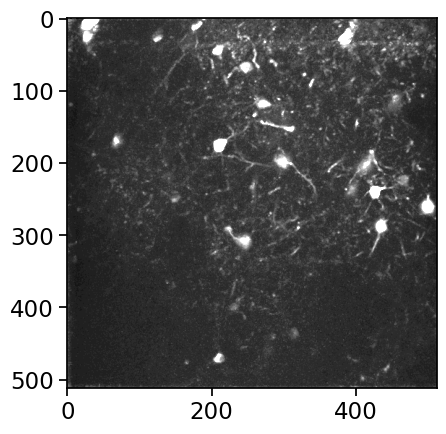

In [9]:
# Plot the maximum intensity projection
plt.imshow(ophys_experiment.max_projection, cmap='gray', vmin=0, vmax=np.percentile(ophys_experiment.max_projection, 99))

#### Let's repeat what we did yesterday and make that plot of all cells activity across the session again

In [14]:
# First get all the data we need

# Get normalized fluorescence traces
dff_traces = ophys_experiment.dff_traces.copy()

# Get deconvolved events
events = ophys_experiment.events.copy()

# Get timestamps 
ophys_timestamps = ophys_experiment.ophys_timestamps.copy()

# Get stimulus presentations
stimulus_presentations = ophys_experiment.stimulus_presentations.copy()

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


Text(0, 0.5, 'Event magnitude (dF/F)')

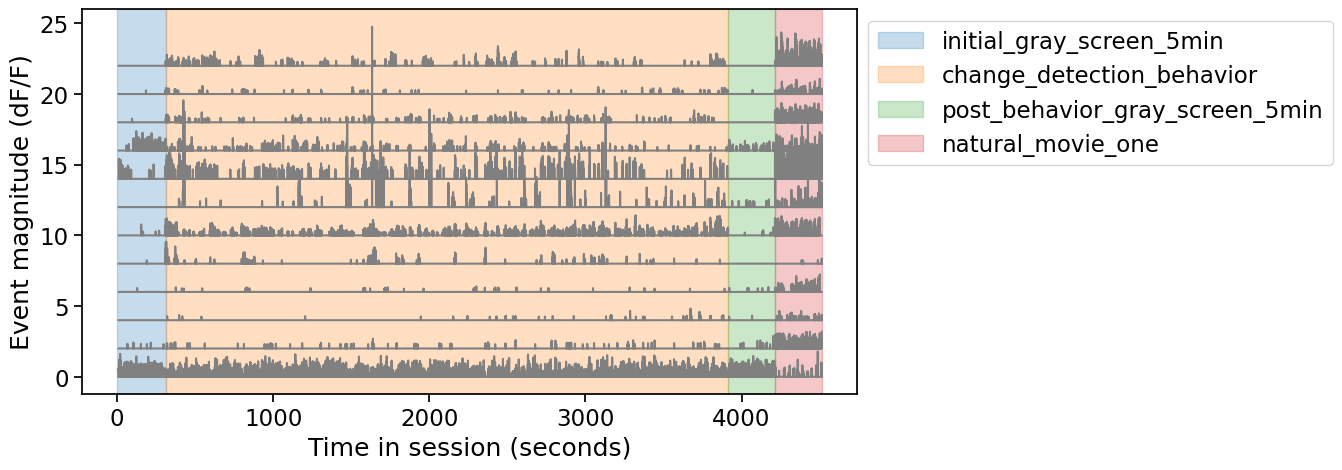

In [24]:
# Now plot events traces for all cells and plot stimulus blocks overlaid

# Plot events for all cells
fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')    

# Iterate through stimulus blocks and show them in color
colors = sns.color_palette()
for i, stimulus_block_name in enumerate(stimulus_presentations.stimulus_block_name.unique()): 
    stimulus_block_data = stimulus_presentations[stimulus_presentations.stimulus_block_name==stimulus_block_name]
    ax.axvspan(xmin=stimulus_block_data.start_time.values[0], xmax=stimulus_block_data.end_time.values[-1], 
               color=colors[i], alpha=0.25, label=stimulus_block_name)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Event magnitude (dF/F)')

These cells seem to care about different things. 

Some are active during the behavior session (orange), others are active during the natural movie (red). Some are more active during the gray screen (blue and green) than during the task. 

Why might cells show these differences in activity? What features of each part of the session could they care about? 

### Relationship of neural activity with stimulus and behavior

Yesterday we looked at a cell with a very regular firing pattern, but we didnt actually check what it was responding to. 

Let's plot it again, then overlay stimulus and behavior information to see what it might care about. 

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/1098060379.py:6: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]


Text(0.5, 1.0, 'cell_specimen_id: 1086613265')

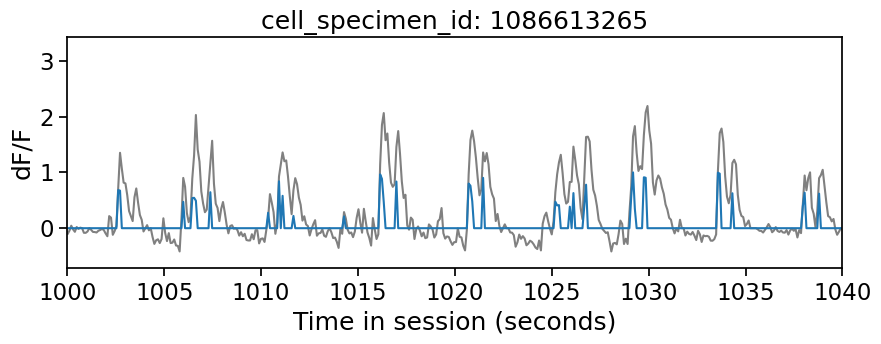

In [34]:
# It happened to be the very first cell in the experiment, lets grab it's traces and plot them for a defined window of time
cell_index = 0

# Get its unique identifier, the cell_specimen_id
cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]
# The cell_specimen_id is the index to the traces tables
dff_trace = dff_traces.loc[cell_specimen_id]['dff']
events_trace = events.loc[cell_specimen_id]['events']

# Pick the same 40 second window as yesterday
window_start = 1000
window_end = 1040

# Plot events and dF/F, in seconds
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_trace, color='gray', label='dF/F')
ax.plot(ophys_timestamps, events_trace, color=sns.color_palette()[0], label=events)
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('dF/F')
# Limit to our specified window
ax.set_xlim(window_start, window_end)
# Put the cell ID in the title so we know who this cell is
ax.set_title('cell_specimen_id: '+str(cell_specimen_id))

What is going on during the session when the cell is behaving this way? Is it responding to the stimulus?

#### Let's use the functions we wrote yesterday to plot stimulus and behavior along with the cell trace

In [48]:
# Functions defined in day 1 intro

def plot_running_speed_in_window(running_speed, window_start, window_end, ax): 
    '''
    A function to plot running speed in specific window of time on the provided axis
    
    running_speed: A table including columns for `running_speed` and `timestamps`
    '''
    # Plot the running speed, in seconds, on the provided axis
    ax.plot(running_speed.timestamps, running_speed.speed)
    ax.set_ylabel('Running speed (cm/s)')
    ax.set_xlabel('Time in session (seconds)')
    # Limit to the selected window
    ax.set_xlim(window_start, window_end)

    # Return axes so we can add other things to it 
    return ax


def plot_licks_in_window(licks, window_start, window_end, ax): 
    '''
    A function to plot licks occuring in specific window of time on the provided axis
    
    licks: A table with timestamps of each lick in the session
    '''
    # Get licks in the provided window
    window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
    # Iterate through them and plot as a line
    for idx, lick in window_licks.iterrows():
        ax.plot(lick.timestamps, -1, '|', color='gray')

    # Return axes so we can add other things to it 
    return ax


def plot_rewards_in_window(rewards, window_start, window_end, ax): 
    '''
    A function to plot rewards occuring in specific window of time on the provided axis
    
    rewards: A table with timestamps of each reward in the session
    '''
    # Get rewards in the provided window
    window_rewards = rewards[(rewards.timestamps>=window_start) & (rewards.timestamps<=window_end)]
    # Iterate through them and plot as a line
    for idx, reward in window_rewards.iterrows():
        ax.plot(reward.timestamps, -1.5, 'o', color='cyan')

    # Return axes so we can add other things to it 
    return ax


def plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax): 
    '''
    A function to plot a colored bar for each unique image_name in a specific window of time
    within the provided stimulus_presentations table, on the provided axis. 
    
    stimulus_presentations: Table of all stimulus presentations and associated metadata
                            Function will limit to the `change_detection_behavior` block when image presentations occur
    '''

    # Make sure we are only looking at stimuli during the change detection block (other stimulus blocks do not have unique image names)
    stimulus_presentations = stimulus_presentations[(stimulus_presentations.stimulus_block_name=='change_detection_behavior')]

    # create colormap for unique image names
    colors = sns.color_palette('hls', len(stimulus_presentations.image_name.unique()))
    image_colors_dict = {}
    for i, image_name in enumerate(np.sort(stimulus_presentations.image_name.unique())): 
        # omissions are white
        if image_name == 'omitted': 
            image_colors_dict[image_name] = [1, 1, 1]
        # images are in color
        else: 
            image_colors_dict[image_name] = colors[i]

    # Get all stimuli in the provided window
    window_stimuli = stimulus_presentations[(stimulus_presentations.start_time>=window_start) & 
                                          (stimulus_presentations.end_time<=window_end)]

    # Loop through stimuli and plot them
    for idx, stimulus in window_stimuli.iterrows():
        image_name = stimulus['image_name']
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)

    # Return axes so we can add other things to it   
    return ax

In [49]:
# Make functions to plot a cell's dff or events trace

def plot_cell_dff_trace_in_window(ophys_timestamps, dff_traces, cell_specimen_id, window_start, window_end, ax):
    '''
    A function to plot one cell's dF/F traces in a defined window, on the given axis
    
    ophys_timestamps: Array of timestamps corresponding to each ophys trace timepoint
    dff_traces: A table with dff_traces for each cell_specimen_id in the experiment
    cell_specimen_id: Which cell to plot
    window_start: start time, in seconds, of window for plot
    window_end: end time, in seconds, of window for plot
    '''
    # The cell_specimen_id is the index to the traces tables
    dff_trace = dff_traces.loc[cell_specimen_id]['dff']

    # Plot events and dF/F, in seconds
    ax.plot(ophys_timestamps, dff_trace, color='gray', label='dF/F')
    ax.set_xlabel('Time in session (seconds)')
    ax.set_ylabel('dF/F')

    # Limit to our specified window
    ax.set_xlim(window_start, window_end)

    # Put the cell ID in the title so we know who this cell is
    ax.set_title('cell_specimen_id: '+str(cell_specimen_id))
    
    return ax


def plot_cell_events_in_window(ophys_timestamps, events, cell_specimen_id, window_start, window_end, ax):
    '''
    A function to plot one cell's deconvolved events in a defined window, on the given axis
    
    ophys_timestamps: Array of timestamps corresponding to each ophys trace timepoint
    events: A table with deconvolved events for each cell_specimen_id in the experiment
    cell_specimen_id: Which cell to plot
    window_start: start time, in seconds, of window for plot
    window_end: end time, in seconds, of window for plot
    '''
    # The cell_specimen_id is the index to the traces tables
    events_trace = events.loc[cell_specimen_id]['events']

    # Plot events and dF/F, in seconds
    ax.plot(ophys_timestamps, events_trace, color=sns.color_palette()[0], label=events)
    ax.set_xlabel('Time in session (seconds)')
    ax.set_ylabel('Event magnitude (dF/F)')

    # Limit to our specified window
    ax.set_xlim(window_start, window_end)

    # Put the cell ID in the title so we know who this cell is
    ax.set_title('cell_specimen_id: '+str(cell_specimen_id))
    
    return ax

#### Cell 1 

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/1339165322.py:5: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]


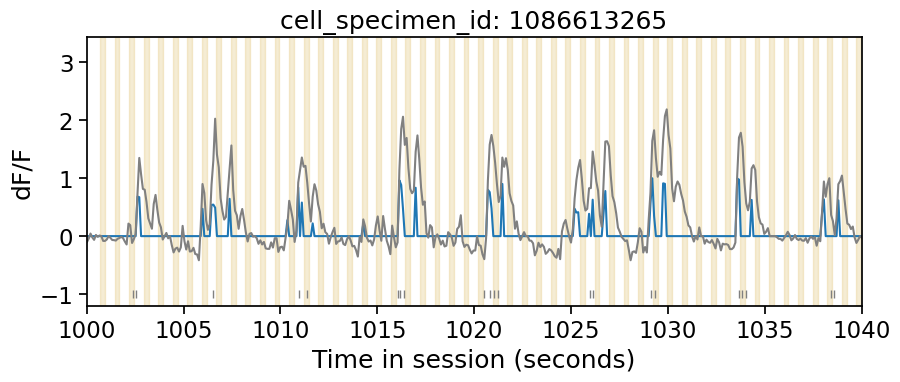

In [53]:
# Plot stimulus and behavior together in this window using our functions

# Set cell specimen ID and window to plot
cell_index = 0
cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]

window_start = 1000
window_end = 1040

fig, ax = plt.subplots(figsize=(10, 3.5))

# plot dFF and events traces
ax = plot_cell_events_in_window(ophys_timestamps, events, cell_specimen_id, window_start, window_end, ax)
ax = plot_cell_dff_trace_in_window(ophys_timestamps, dff_traces, cell_specimen_id, window_start, window_end, ax)

# Plot stimuli using function we created, for the subset of stimuli we selected
ax = plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax)

# Plot licks in the window we selected
ax = plot_licks_in_window(ophys_experiment.licks, window_start, window_end, ax)

# Plot rewards in the window we selected
ax = plot_rewards_in_window(ophys_experiment.rewards, window_start, window_end, ax)

Well that sure is interesting! This cell appears to increase its activity just after the mouse licks! 

Lets look at another time period for the same cell. Maybe it will look different if a different stimulus is being shown.

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/3692817983.py:3: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]


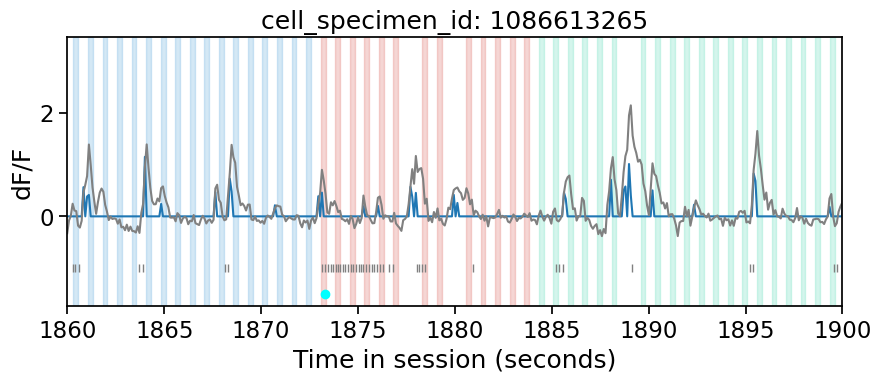

In [139]:
# Set cell specimen ID and window to plot
cell_index = 0
cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]

window_start = 1860
window_end = window_start+40

fig, ax = plt.subplots(figsize=(10, 3.5))

# plot dFF and events traces
ax = plot_cell_events_in_window(ophys_timestamps, events, cell_specimen_id, window_start, window_end, ax)
ax = plot_cell_dff_trace_in_window(ophys_timestamps, dff_traces, cell_specimen_id, window_start, window_end, ax)

# Plot stimuli using function we created, for the subset of stimuli we selected
ax = plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax)

# Plot licks in the window we selected
ax = plot_licks_in_window(ophys_experiment.licks, window_start, window_end, ax)

# Plot rewards in the window we selected
ax = plot_rewards_in_window(ophys_experiment.rewards, window_start, window_end, ax)

The cell doesnt seem to care about which image is shown, but it sure does like it when the mouse licks! It also seems to care about omissions...

Based on what we have seen in the raw data, you would expect this cell to have a big difference in activity for **hit** trials (when the mouse correctly licks after a change) versus **miss** trials (when there is no lick), and minimal selectivity for image identity. It also may be driven by stimulus omissions (lack of sensory input, or an unexpected event given the task context)

#### Let's try another cell

#### Cell 5

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/1254225186.py:3: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]


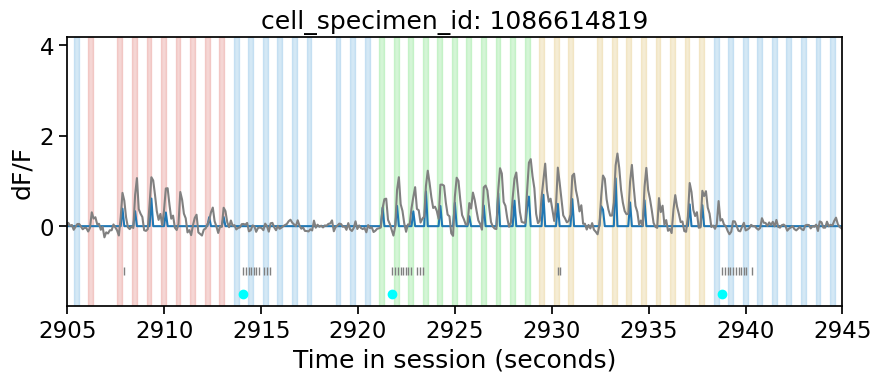

In [146]:
# Set cell specimen ID and window to plot
cell_index = 5
cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]

window_start = 2905
window_end = window_start+40

fig, ax = plt.subplots(figsize=(10, 3.5))

# plot dFF and events traces
ax = plot_cell_events_in_window(ophys_timestamps, events, cell_specimen_id, window_start, window_end, ax)
ax = plot_cell_dff_trace_in_window(ophys_timestamps, dff_traces, cell_specimen_id, window_start, window_end, ax)

# Plot stimuli using function we created, for the subset of stimuli we selected
ax = plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax)

# Plot licks in the window we selected
ax = plot_licks_in_window(ophys_experiment.licks, window_start, window_end, ax)

# Plot rewards in the window we selected
ax = plot_rewards_in_window(ophys_experiment.rewards, window_start, window_end, ax)

This cell appears to be image responsive, but somewhat broadly tuned. It likes 3 of the images in this window of time, but not the one represented in blue.  

#### All cells in window

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/641548980.py:2: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_ids = ophys_experiment.get_cell_specimen_ids()


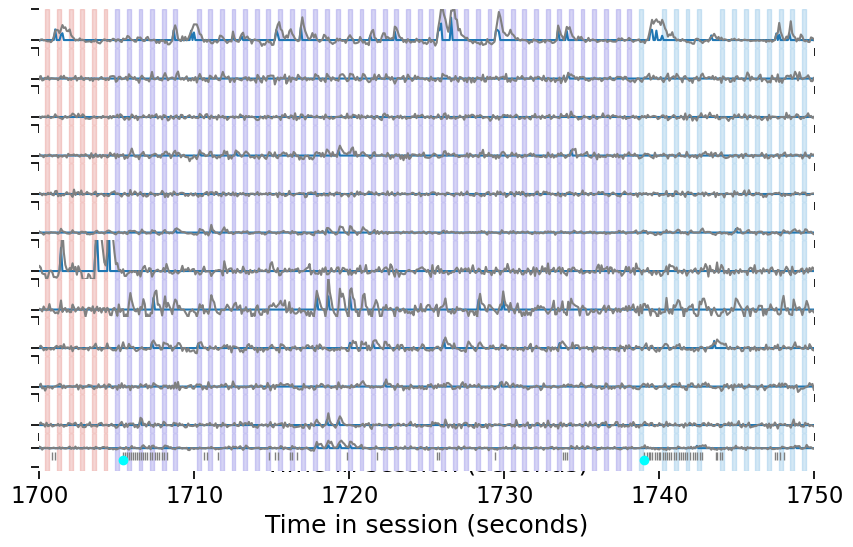

In [159]:
# # Plot for all cells on the same axis
# cell_specimen_ids = ophys_experiment.get_cell_specimen_ids()

# window_start = 1700
# window_end = window_start+50

# fig, ax = plt.subplots(len(cell_specimen_ids), 1, figsize=(10, 6))

# for i, cell_specimen_id in enumerate(cell_specimen_ids): 
#     # plot dFF and events traces
#     ax[i] = plot_cell_events_in_window(ophys_timestamps, events, cell_specimen_id, window_start, window_end, ax[i])
#     ax[i] = plot_cell_dff_trace_in_window(ophys_timestamps, dff_traces, cell_specimen_id, window_start, window_end, ax[i])

#     # Plot stimuli using function we created, for the subset of stimuli we selected
#     ax[i] = plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax[i])

    
#     ax[i].set_title('')
#     ax[i].set_ylabel('')
#     ax[i].set_yticklabels([])
#     ax[i].spines[['right', 'top', 'bottom', 'left']].set_visible(False)
#     if i < len(cell_specimen_ids)-1:
#         ax[i].set_xticklabels([])
#         ax[i].set_ylim(-0.5, 2)

# # Plot licks in the window we selected
# ax[i] = plot_licks_in_window(ophys_experiment.licks, window_start, window_end, ax[i])

# # Plot rewards in the window we selected
# ax[i] = plot_rewards_in_window(ophys_experiment.rewards, window_start, window_end, ax[i])

# ax[i].set_ylim(-3, 2)
        
# plt.subplots_adjust(hspace=0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Aligning neural activity with stimulus presentations </h3>

We now have two interesting cells that might have unique coding properties. How can we quantify what these cells represent?

One way is to simply plot an image tuning curve, or compare the response to hits and misses, to evaluate how different the cells responses are to different conditions, and quantify the variability in that response. 

Tuning curves can be considered as a simple model of cell activity. 

But to compute these features, first we need to align neural activity to the times of stimulus presentations, and compute the average evoked response. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

One challenge in computing event triggered responses is that the ophys data and stimulus presentations are sampled at different frequencies, so it is not possible to simply index from one into the other. 

Check the `metadata` attribute of the ophys_experiment object and compare the `stimulus_frame_rate` and `ophys_frame_rate`

In [162]:
metadata = ophys_experiment.metadata
metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

In [163]:
metadata['ophys_frame_rate']

11.0

In [164]:
metadata['stimulus_frame_rate']

60.0

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>

If we want to compute stimulus aligned cell activity, we will need a way to associate ophys timestamps with the nearest stimulus timestamps. 

Fortunately, the `brain_observatory_utilities` package provides tools to make this easier. 

We can use the `get_stimulus_response_df` function from the `datasets.optical_physiology.data_formatting` module to get the stimulus locked activity for all cells in the dataset. 

The `get_stimulus_response_df` function works by finding the nearest timepoint in the `ophys_timestamps` for every `start_time` in the `stimulus_presentations` table, then extracts a snippet of each cell's activity around each stimulus start time. 

To understand how this function works in more detail, you can check the documentation, or go through the tutorial on how this function works here: *** insert link ***

For now, we are going to go ahead and plug in our data and see what comes out. 


In [165]:
import brain_observatory_utilities.datasets.optical_physiology.data_formatting as data_formatting

In [178]:
# Get stimulus aligned dff traces (using data_type input) for image changes (using event_type input)
# For a +/-1 second window (using time_window input)
# The default response_window_duration is 0.5, which means the average in a 0.5 second window after the stimulus onset will be computed
# interpolating the traces to 30Hz ensures that the timestamps are nicely consistent across trials, but this isnt strictly necessary
stimulus_response_df = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='dff', event_type='changes',
                                                            time_window=[-1, 2], response_window_duration=0.5,
                                                            interpolate=False, output_sampling_rate=30)
stimulus_response_df.head()

100%|██████████| 12/12 [00:00<00:00, 304.78it/s]


,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,interpolate,output_sampling_rate,response_window_duration
0,19,1086613265,"[-0.055681996047496796, 0.10152164846658707, -...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.086062,-0.034766,1.0,30,dff,changes,False,30,0.5
1,19,1086613823,"[0.10811472684144974, -0.09375055879354477, -0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.021288,-0.092857,1.0,30,dff,changes,False,30,0.5
2,19,1086614149,"[-0.10819042474031448, -0.05545996129512787, 0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.031505,-0.005291,1.0,30,dff,changes,False,30,0.5
3,19,1086614351,"[0.23392416536808014, 0.04753502830862999, 0.0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.187149,0.153655,1.0,30,dff,changes,False,30,0.5
4,19,1086614819,"[0.018694309517741203, -0.01922120340168476, 0...","[-0.9323291255303736, -0.8390962129773363, -0....",0.726140,0.798080,0.0,30,dff,changes,False,30,0.5


The `ophys_experiment` argument to the `get_stimulus_response` function is an instance of the ophys_experiment object that we have been working with.

The `get_stimulus_response` function is smart and already knows what our data structures look like, 
so it can pull out the relevant information from the cell activity tables (`dff_traces` and `events`) 
and from the `stimulus_presentations` table.

Note that the `stimulus_presentations_id` column is incuded in the table. This can be used to merge in the stimulus metadata so that you can sort the cell responses by different stimulus and task conditions. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>

We can stimulus metadata by merging the `stimulus_response_df` and the `stimulus_presentations` table using the `stimulus_presentations_id` column. 

Pandas `.merge()` is a method that can be called on any dataframe. The input to the method is another dataframe, and the name of one or more columns that are present in both dataframes (provided as a list to the `on` argument - i.e. what column to merge on). 


If the two dataframes do not have any columms in common, they cannot be merged. If the two dataframes have multiple colums with the same name, but only one of the columns is provided in the `on` argument, both of the redundant columns will be kept, and an '_x' and '_y' will be added to the column names to distinguish them.  

Check the documentation for the `pandas.merge` function if you need a reminder on how to use it. https://pandas.pydata.org/docs/reference/api/pandas.merge.html 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Check the columns of `stimulus_response_df` and `stimulus_presentations`. Which columns do they have in common? Are there more than one? Are the unique values of the column the same?

In [179]:
stimulus_response_df.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration'],
      dtype='object')

In [180]:
stimulus_presentations.columns

Index(['stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'stimulus_name',
       'active', 'is_sham_change'],
      dtype='object')

#### Add stimulus metadata to table of stimulus aligned cell responses 

Let's call the `merge()` method on the `stimulus_response_df` and provide it with the `stimulus_presentations` table, and instruct it to merge on the one column they have in common - `stimulus_presentations_id`

In [181]:
stimulus_response_df = stimulus_response_df.merge(stimulus_presentations, on='stimulus_presentations_id')
stimulus_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,active,is_sham_change
0,19,1086613265,"[-0.055681996047496796, 0.10152164846658707, -...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.086062,-0.034766,1.0,30,dff,changes,...,18810,True,False,False,-99,0,4,Natural_Images_Lum_Matched_set_training_2017,True,False
1,19,1086613823,"[0.10811472684144974, -0.09375055879354477, -0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.021288,-0.092857,1.0,30,dff,changes,...,18810,True,False,False,-99,0,4,Natural_Images_Lum_Matched_set_training_2017,True,False
2,19,1086614149,"[-0.10819042474031448, -0.05545996129512787, 0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.031505,-0.005291,1.0,30,dff,changes,...,18810,True,False,False,-99,0,4,Natural_Images_Lum_Matched_set_training_2017,True,False
3,19,1086614351,"[0.23392416536808014, 0.04753502830862999, 0.0...","[-0.9323291255303736, -0.8390962129773363, -0....",-0.187149,0.153655,1.0,30,dff,changes,...,18810,True,False,False,-99,0,4,Natural_Images_Lum_Matched_set_training_2017,True,False
4,19,1086614819,"[0.018694309517741203, -0.01922120340168476, 0...","[-0.9323291255303736, -0.8390962129773363, -0....",0.726140,0.798080,0.0,30,dff,changes,...,18810,True,False,False,-99,0,4,Natural_Images_Lum_Matched_set_training_2017,True,False


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What columns exist in your new `stimulus_response_df`? 


In [182]:
# Check out the columns available
stimulus_response_df.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration',
       'stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'stimulus_name',
       'active', 'is_sham_change'],
      dtype='object')

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_6901/2665202812.py:3: VisibleDeprecationWarning: Function get_cell_specimen_ids is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using cell_specimen_table['cell_specimen_id'] instead.
  cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]


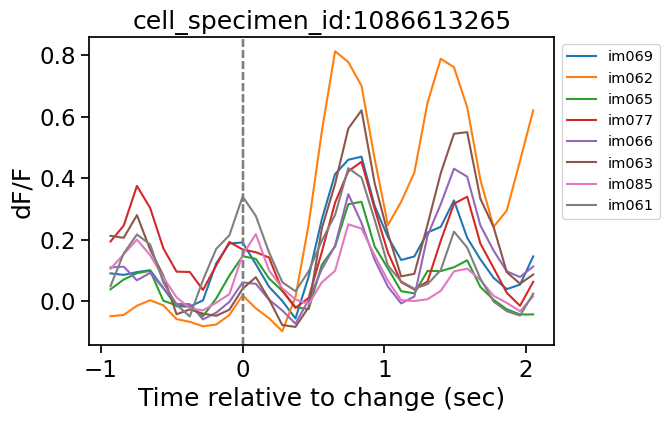

In [183]:
# Plot the average response for the cell we care about
cell_index = 0
cell_specimen_id = ophys_experiment.get_cell_specimen_ids()[cell_index]

# get the relevant data
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
# get the timestamps for one row ()
timestamps = cell_df.trace_timestamps.values[0]
# Get a colormap for different images
colors = sns.color_palette()

# make the plot
fig, ax = plt.subplots(figsize=(6,4))
for i, image_name in enumerate(cell_df.image_name.unique()): 
    # get the average dff trace
    mean_trace = cell_df[cell_df.image_name==image_name].trace.mean()
    # plot it with a different color for each image
    ax.plot(timestamps, mean_trace, color=colors[i], label=image_name)
    ax.set_title('cell_specimen_id:'+str(cell_specimen_id))
    ax.set_xlabel('Time relative to change (sec)')
    ax.set_ylabel('dF/F')
    # Let's put a gray dotted line where the change happens 
    ax.axvline(x=0, ymin=0, ymax=1, linestyle='--', color='gray')
ax.legend(bbox_to_anchor=(1,1), fontsize='xx-small')



<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Hurray!! We can exact stimulus evoked responses! Now we can finally start asking the questions we outlined at the beginning!! 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Part 2 -  Tuning for stimulus & behavior during task performance </h2>

(1) Are neurons in the mouse visual cortex selective for specific visual stimuli? How reliable are their responses?

(2) Do stimulus responses differ depending on the mouse's behavioral choice during the task? 

(3) Do neurons in the mouse visual cortex modulate their activity as a function of running speed? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Stimulus tuning & response variability </h3>

Let's start by asking whether individual cells respond differently to the 8 different images shown in each Visual Behavior Ophys session

Then we will evaluate how consistent that response is, and whether it is valid to claim that the cell "encodes" a given image. 

Let's revisit the `stimulus_response_df` for the `cell_specimen_id` we are interested in.

The `mean_response` column contains the average value of the dF/F signal (which is what we provied as the `data_type` to the `get_stimulus_response_df` function - we could replace that with `events` to use deconvolved events instead) in a pre-defined window of time following the stimulus onset (determined by the value of `response_window_duration` provided to the `get_stimulus_response_df` function above). 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the data from `stimulus_response_df` just for our `cell_specimen_id` of interest and assign it to its own variable.

Get the average value of the `mean_response` column for each unique `image_name` in the `stimulus_response_df` for our cell and plot it. 

The y-axis should be the value of the `mean_response` and the x-axis should be the `image_name`. 

Bonus points for using `pandas.groupby` for this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html 

In [32]:
# Get data for our cell
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
cell_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,active,stimulus_name,is_sham_change
1,6,1120091421,"[0.48840686539676137, 0.22332564557439016, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",0.146111,0.689599,0.0,30,dff,changes,...,18225,True,False,False,-99,0,0,True,Natural_Images_Lum_Matched_set_training_2017,False
6,16,1120091421,"[-0.7542644845630652, -0.7542644845630652, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.096635,0.098472,1.0,30,dff,changes,...,18675,True,False,False,-99,0,1,True,Natural_Images_Lum_Matched_set_training_2017,False
11,43,1120091421,"[-0.27913632618053036, -0.22285247401990332, -...","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.049243,-0.000074,1.0,30,dff,changes,...,19890,True,False,False,-99,0,7,True,Natural_Images_Lum_Matched_set_training_2017,False
16,55,1120091421,"[-0.11058010717359511, -0.11058010717359511, -...","[-1.0, -0.9666666666666667, -0.933333333333333...",0.175423,-0.040446,0.0,30,dff,changes,...,20430,True,False,False,-99,0,8,True,Natural_Images_Lum_Matched_set_training_2017,False
21,80,1120091421,"[0.3264055709138106, 0.17985987359340455, -0.0...","[-1.0, -0.9666666666666667, -0.933333333333333...",1.325695,-0.271294,0.0,30,dff,changes,...,21555,True,False,False,-99,0,12,True,Natural_Images_Lum_Matched_set_training_2017,False


In [33]:
# Get average of mean response column for each cell
# You could do this using a for loop, but using pandas groupby is better
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
tuning_curve

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/1012068738.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]


,mean_response
image_name,
im061,-0.029052
im062,-0.045840
im063,0.203203
im065,0.070129
im066,0.458043
im069,-0.009469
im077,0.039101
im085,0.164133


/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/3657959812.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


Text(0, 0.5, 'dF/F')

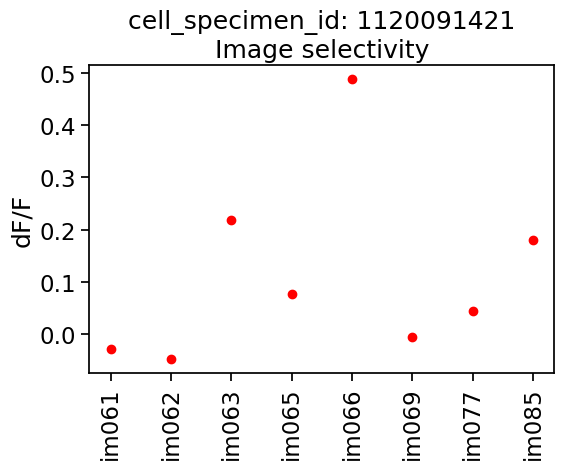

In [114]:
# Plot the mean response for each image
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(tuning_curve.index.values, tuning_curve.mean_response.values, 'or')
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot the `mean_response` for each individual presentation of each image, along with the mean response. 

How variable is the cell activity across repeated presentations of a given image?

Bonus points for using `seaborn.scatterplot` function with the `stimulus_response_df` dataframe for this cell as the input: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/3515461285.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/3515461285.py:13: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(data=cell_df, x='image_name', y='mean_response', order=image_names, color='r', join=False, ax=ax)
/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/3515461285.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


Text(0, 0.5, 'dF/F')

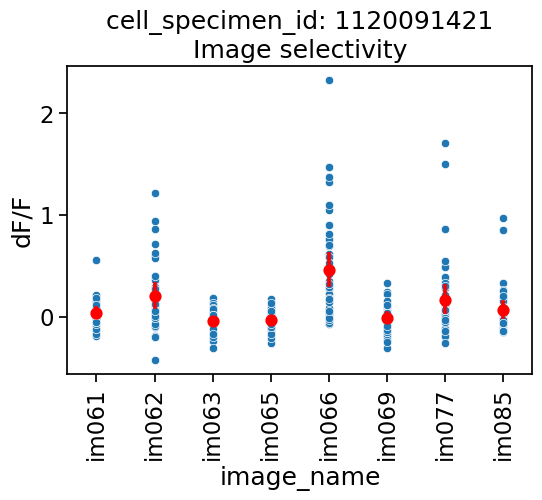

In [116]:
# Plot the mean response for each image

# Get cell data and compute tuning curve using groupby
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]

# Get sorted image names for x-axis
image_names = np.sort(tuning_curve.index.values)

# Make the plot
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=cell_df, x='image_name', y='mean_response', ax=ax)
ax = sns.pointplot(data=cell_df, x='image_name', y='mean_response', order=image_names, color='r', join=False, ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')

These look pretty different!! What could cause these differences? 

One factor is task engagement. Mice often perform the task better in the first half than the second half, because they are more motivated. 
When they are engaged, most of the trials are hits. When the mice disengage, they have a lot more misses.

We can split the data by hit and miss trials to see whether the mouse's behavioral choice influences tuning. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Does behavior choice affect stimulus response? </h3>

Let's try splitting the data based on whether each image change resulted in a <b>hit</b> or a <b>miss</b> and see if the mouse's behavioral choice influences the response of our cell of interest



![Trial_diagram.png](../../resources/Trial_diagram.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Above we looked at responses to individual images that were shown during the session. 
Now we want to look at image changes that were either a <b>hit</b>, where the mouse correctly licked following the change, or a <b>miss</b>, where the mouse failed to lick after the change. 

First we need to figure out whether the mouse correctly licked following each image change or not

We could do this by determining whether there was a lick or a reward for each trial. Let's look at the `licks` and `rewards` attributes of the dataset object

In [40]:
# Timestamps of every lick in the session
ophys_experiment.licks.head()

,timestamps,frame
0,12.57131,194
1,20.21088,652
2,21.14499,708
3,22.19586,771
4,55.25611,2753


In [41]:
# Timestamps of every reward in the session
ophys_experiment.rewards.head()

,volume,timestamps,auto_rewarded
0,0.005,313.23364,True
1,0.005,320.75645,True
2,0.005,341.02302,True
3,0.005,350.01370,True
4,0.005,368.77903,True


To figure out which image changes had a correct lick or not (and thus correspond ot a hit or a miss), we would need to compare the onset times of each image change in the `stimulus_presentations` table to the lick times in the `licks` table (or the reward times in the `rewards` table) to see if there was a lick (or a reward) within 750ms of the stimulus onset. 

This is technically straightforward but can be tedious, so to save some time so that you can focus on asking interesting questions rather than data munging, we will provide you with some tools to annotate the `stimulus_presentations` table with things like lick and reward times for each image presentation. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4> Annotating stimulus presentations with behavior information </h4>
<p>

The `brain_observatory_utilities` package provides a useful tool to annotate the `stimulus_presentations` table with information about what happened during each stimulus, including timing of `licks`, `rewards`, and whether the trial was a <b>hit</b> or a <b>miss</b> trial. 

It will also add the average `running_speed` and `pupil_width` for each stimulus presentation. These can be used to filter data, or plot directly against cell activity to ask about he relationship between running and neural activity. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

The `get_annotated_stimulus_presentations` function can be found in the `datasets.behavior.data_formatting` module of `brain_observatory_utilities`. It takes in the <b>dataset</b> object, which contains everything it needs to know about stimulus presentations, licks, rewards, running, etc., and returns an annotated version of the `stimulus_presentations` table.

Let's check out the documentation

In [42]:
import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_utils

In [43]:
behavior_utils.get_annotated_stimulus_presentations?

Signature:
behavior_utils.get_annotated_stimulus_presentations(
    ophys_experiment,
    epoch_duration_mins=10,
)
Docstring:
Takes in an ophys_experiment dataset object and returns the stimulus_presentations table with additional columns.
Adds several useful columns to the stimulus_presentations table, including the mean running speed and pupil diameter for each stimulus,
the times of licks for each stimulus, the rolling reward rate, an identifier for 10 minute epochs within a session,
whether or not a stimulus was a pre-change or pre or post omission, and whether change stimuli were hits or misses
:param ophys_experiment: obj
    AllenSDK BehaviorOphysExperiment object
    A BehaviorOphysExperiment instance
    See https://github.com/AllenInstitute/AllenSDK/blob/master/allensdk/brain_observatory/behavior/behavior_ophys_ophys_experiment.py  # noqa E501
:return: stimulus_presentations attribute of BehaviorOphysExperiment, with additional columns added
File:      ~/Documents/Code/brain

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `get_annotated_stimulus_presentations` function to get the annotated stimulus presentations table and assign it to a variable called `annotated_stim_table`. Inspect the columns.

In [44]:
# Provide dataset object to run the function
annotated_stim_table = behavior_utils.get_annotated_stimulus_presentations(dataset)

In [45]:
# Look at the output
annotated_stim_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,...,time_from_last_change,pre_change,licked,lick_on_next_flash,pre_omitted,post_omitted,reward_rate,engaged,engagement_state,epoch
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
1,1,change_detection_behavior,0,im065,-99,0.25021,309.366891,309.617101,17985,18000,...,NaN,False,False,False,False,<NA>,inf,True,engaged,0
2,1,change_detection_behavior,0,im065,-99,0.25022,310.117501,310.367721,18030,18045,...,NaN,False,False,False,False,False,inf,True,engaged,0
3,1,change_detection_behavior,0,im065,-99,0.25019,310.868141,311.118331,18075,18090,...,NaN,False,False,False,False,False,inf,True,engaged,0
4,1,change_detection_behavior,0,im065,-99,0.25020,311.618751,311.868951,18120,18135,...,NaN,False,False,False,False,False,inf,True,engaged,0
5,1,change_detection_behavior,0,im065,-99,0.25022,312.369321,312.619541,18165,18180,...,NaN,True,False,False,False,False,inf,True,engaged,0


In [46]:
# Look at all the useful new columns!
annotated_stim_table.columns

Index(['stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'active',
       'stimulus_name', 'is_sham_change', 'licks', 'mean_running_speed',
       'mean_pupil_width', 'change_time', 'go', 'catch', 'aborted',
       'auto_rewarded', 'hit', 'miss', 'false_alarm', 'correct_reject',
       'response_time', 'response_latency', 'reward_time', 'reward_volume',
       'time_from_last_change', 'pre_change', 'licked', 'lick_on_next_flash',
       'pre_omitted', 'post_omitted', 'reward_rate', 'engaged',
       'engagement_state', 'epoch'],
      dtype='object')

To be able to sort cell activity based on whether each image change in the stimulus table was a hit or a miss, we will want to merge the `stimulus_response_df` and with this new annotated table. Let's recompute the stimulus response dataframe and merge it with the `annotated_stim_table`.

In [47]:
# Get the stimulus response dataframe just for image changes
stim_response_df = data_formatting.get_stimulus_response_df(dataset, data_type='dff', event_type='changes',
                                                            time_window=[-1, 1], response_window_duration=0.5,
                                                            interpolate=True, output_sampling_rate=None)

# Merge it with the annotated stim table so you can filter cell responses based on behavior choice                                                       
stim_response_df = stim_response_df.merge(annotated_stim_table, on='stimulus_presentations_id')


100%|██████████| 5/5 [00:00<00:00, 42.07it/s]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>
Now we can plot tuning curves separately for hits and misses.

Limit the `stimulus_response_df` to image changes, then split by hit & miss trials. 

Plot our cell's image tuning curve (and the variability around the mean) using seaborn's pointplot, showing hits and misses using different colors

In [48]:
cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]
hits = cell_df[(cell_df.is_change)&(cell_df.hit)]
misses = cell_df[(cell_df.is_change)&(cell_df.miss)]

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/1688810622.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/1688810622.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


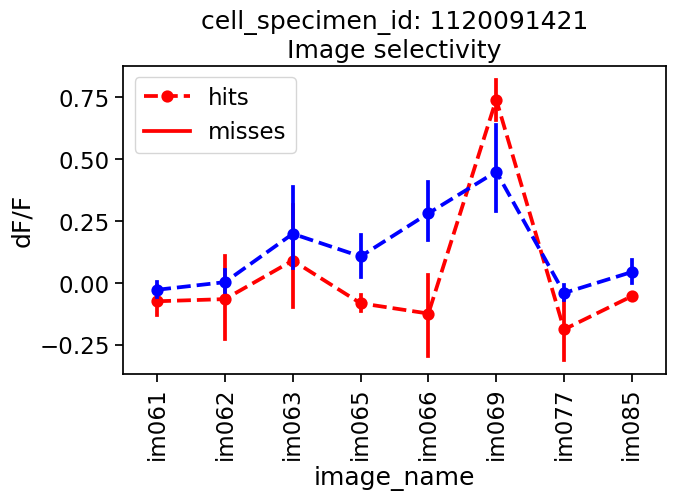

In [49]:
# Plot the mean response for each image split by hit and miss

cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]

fig, ax = plt.subplots(figsize=(7,4))
# ax = sns.scatterplot(data=hits, x='image_name', y='mean_response', ax=ax, color='pink')
ax = sns.pointplot(data=hits, x='image_name', y='mean_response', color='r', join=False, ax=ax)
# ax = sns.scatterplot(data=misses, x='image_name', y='mean_response', ax=ax, color='cyan')
ax = sns.pointplot(data=misses, x='image_name', y='mean_response', color='b', join=False, ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')
ax.legend(['hits', 'misses'], loc='upper left')

What if it isnt actually the mouse's choice thats influencing the differences in activity seen here? 

What if the mouse runs more or less in the first and second half of the experiment, or if the pupil diameter is correlated with whether or not the mouse receives a reward or not?

## Encoding of stimulus & behavioral choice

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Question 3: How well can you predict neural activity based on stimulus information? Does the prediction improve when additional variables are included?</h3>

One of the useful things about regression models is that that can be used evaluate the role of different kinds of features in predicting data. 

Earlier, we saw that examples of how stimulus identity can be encoded by the activity of a single neuron. Here, we will recast this tuning problem as a regression problem, allowing us to use our regression tool-box to understand this tuning. 

We will then see how using a common modeling framework allows us to quantitatively compare the encoding of different features by analyzing the contribution of each feature to explaining variance in neural activity.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Casting tuning as a regression problem</h3>
    
    
Because our stimulus here consists of a set of 8 discrete images, we need to adapt this framework to make predictions based on predictions are based on a categorical rather than continuous variable (i.e., one of $8$ possible images). In other words, as above, we seek a model of the form:

$$y = \beta x+C,$$

where $y$ is the calcium response, $X$ is now the stimulus identity (a catigorical variable), and $\beta$ and $C$ are constants. 

One way to handle this would be to construct a separate model for each orientation:
$$y = \beta_1 X_1+C_1$$
$$y = \beta_2 X_2+C_2$$
$$\vdots$$
$$y = \beta_8 X_8+C_8 $$
    
Mathematically, this is cumbersome - we would need to look up which equation to use each time we want to predict new data. A more elegant alternative is to combine predictors across orientations into a single model that simply operates piecewise:

$$y = C+ \begin{cases} 
\beta_1 \text{I}_1(X)  \\
\beta_2 \text{I}_2(X) \\
\vdots \\
\beta_8 \text{I}_8(X)
\end{cases}$$
    
where $\text{I}_n(X)$ is the <i>indicator function</i>:
$$ \text{I}_n(X) := \begin{cases}
1 \text{ if } X=n, \\
0 \text{ else}
\end{cases} $$

(Notice that this formulation merges the constants into one value, $C$. $C$ is, effectivly, the offset from zero for any model we fit.)

Thus, as $X$ encodes the stimulus identity, $\text{I}_n(X)$ determines which term in the equation we are operating with. This type of problem is called *"One-Hot"* encoding, because $X$ encodes what part of the equation is active. Practically speaking, we can implement this indicator function by creating a vector for each sample and setting $X_i = 1$ for whichever case is true. For example, if we had just two stimulus types, we might have: 

$$ X_1 = [1,0] $$
$$ X_2 = [0,1] $$ 

Finally, if we have many observations, we can stack each of these $X$ observations to form a "Design Matrix." 

We will have a corresponding fitting parameter vector, $$\beta = [\beta_1,\beta_2,\ldots,\beta_8]$$

Our whole problem can now be written: 
$$y = \beta X$$ 

    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's build out our X matrix, as described above, using the stimulus identity for each stimulus presentation

In [79]:
# Build the X matrix, which is the image identity presented on each trial, encoded as a one-hot vector

# Get index for each image for each stimulus presentation
# By setting the "return_inverse" function of the unique command, you will return
# (1) the list of unique image names and (2) index into that list of each image presentation
img_names,img_index = np.unique(cell_df.image_name.values,return_inverse=True)

# Create an array the length of stimulus presentations by 8 (the number of images)
X = np.zeros((len(img_index),8))
# Loop through image indices and build up the X matrix 
for ii in range(len(img_index)):
    X[ii,img_index[ii]]  = 1


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot it. Label the axes. 

Text(0.5, 0, 'Image')

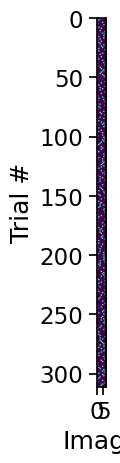

In [80]:
# Plot the X matrix 
fig, ax = plt.subplots()
ax.imshow(X) 
ax.set_ylabel('Trial #')
ax.set_xlabel('Image')

Looks pretty gross, right? X is too tall a matrix to be easily visualized. Lets zoom in on the first bit of it to get a sense for whats really going on.

Text(0.5, 0, 'Image #')

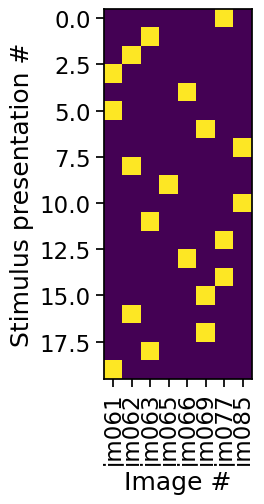

In [81]:
# This is more intuitive if we zoom in
fig,ax = plt.subplots()
ax.imshow(X[:20]) 
ax.set_ylabel('Stimulus presentation #')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90)
ax.set_xlabel('Image #')


Now that we have our design matrix, X, using using it to fit a model is quite simple. We use the same `LinearRegression`` object as before, but now fit with our new design matrix.  



In [82]:
# Set up the model with the LinearRegression object and our new design matrix X, with the cell activity y
model = LinearRegression(fit_intercept=False).fit(X,y)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Earlier, we plotted the tuning curve for this same cell. Lets replot here:

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_97689/2817262332.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


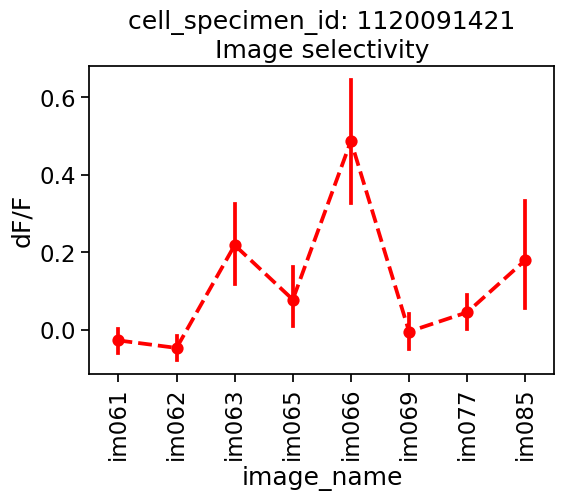

In [83]:
# Make the plot
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.pointplot(data=cell_df, x='image_name', y='mean_response', order=image_names, color='r', linestyle='--', ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot the model coefficients, which are the predictions of the cell's response for each image. 

How does this compare to the tunning curve?

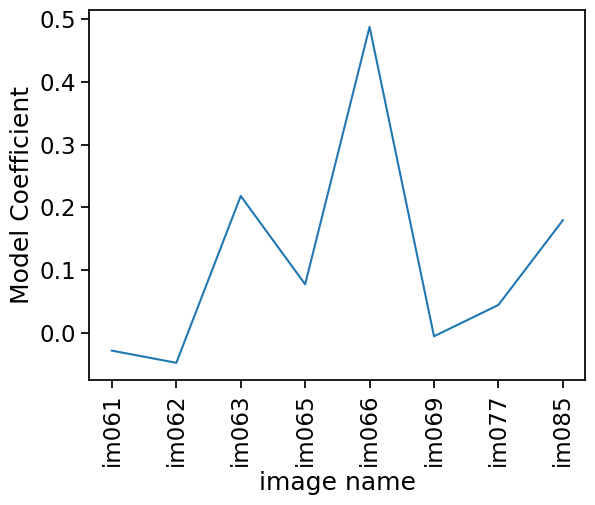

In [84]:
# Plot the coef_ attribute. Label the axes. 
fig,ax = plt.subplots()
ax.plot(model.coef_)
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

You will have notice that we used a new setting when we created the `LinearRegression` object, `fit_intercept=False`. This prevents `LinearRegression` from fitting the constant/intercept term in our model. 

If we were to include this term, the model fit would be ill posed. Our model performance would be the same, but our data would be shifted by an aribtary constant. To see this, try fitting a model with `fit_intercept=True` and looking `coef_` and `intercept_`.

In [85]:
# Fit the model with fit_intercept = True and look at the coefficients and intercept
funky_model = LinearRegression(fit_intercept=True).fit(X, y)
print(f'Coefs: {funky_model.coef_}')
print(f'Intercept: {funky_model.intercept_}')

Coefs: [-5.03371405e+13 -5.03371405e+13 -5.03371405e+13 -5.03371405e+13
 -5.03371405e+13 -5.03371405e+13 -5.03371405e+13 -5.03371405e+13]
Intercept: 50337140527309.4


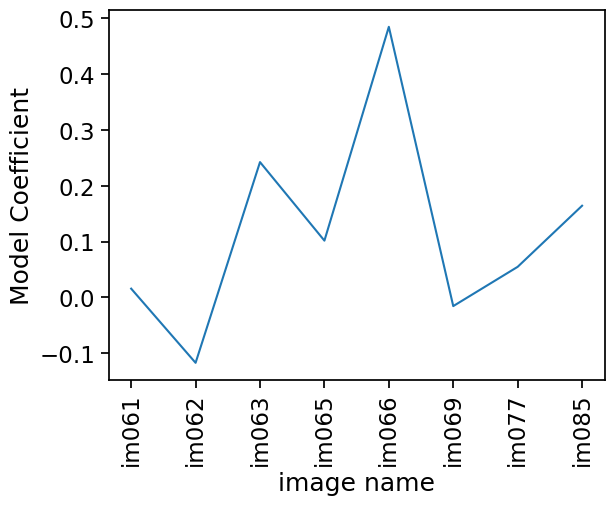

In [86]:
# Because the intercept is just a shift in the data, we can add it back to the
# coefs to recover our origional model
fig,ax = plt.subplots()
ax.plot(funky_model.coef_+funky_model.intercept_)
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now that we know how to use our design matrix, we properly evaluate it using Kfold Cross validation. 

This is done exactly as we did above, with the addition of our new regression parameters.

In [87]:
# First set the seed so you get the same result here no matter what order you run this notebook in!
np.random.seed(5) 

# Initialize KFold object
folderizer = KFold(n_splits=5,shuffle=True)

# Create arrays to save the results
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
models = [None]*5

# Loop over folds, fit the model and collect the scores
for ii, (train_index,test_index) in enumerate(folderizer.split(X,y)):
    models[ii] = LinearRegression(fit_intercept=False).fit(X[train_index,:], y[train_index])
    self_score[ii] = models[ii].score(X[train_index,:], y[train_index])
    cross_score[ii] = models[ii].score(X[test_index,:], y[test_index])
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')
print(f'Average Testing Score: {np.mean(cross_score)}')


Training Score: [0.26540136 0.23421573 0.2485213  0.21699952 0.25389617]
Testing Score: [0.04146961 0.25363125 0.18489542 0.33999858 0.20680467]
Average Testing Score: 0.20535990695746795


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Loop through the folds, as we did above, but now plot the coefficients for each fold to check how consistent the results are

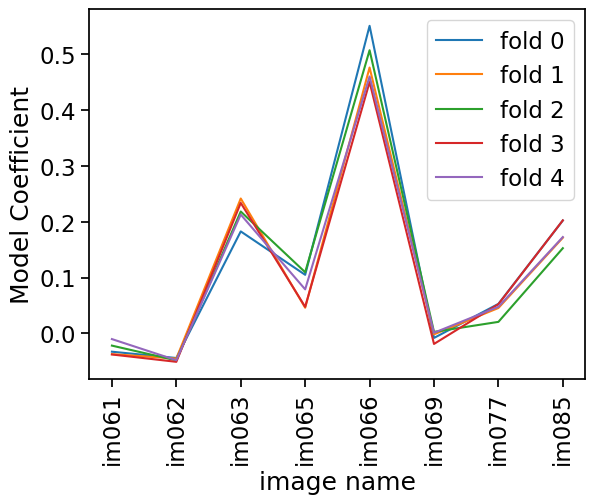

In [88]:

# Create a plot axis to visualize the results
fig,ax = plt.subplots()

# Loop over folds and plot the coefficients
for ii, (train_index, test_index) in enumerate(folderizer.split(X, y)):
    ax.plot(models[ii].coef_, label = f'fold {ii}')
# Label the axes
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);
ax.legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> How do stimulus and behavior information compare? </h3>
    
By fitting models with different combinations of features, we can get a richer sense of how different features are encoded by neural activity. 

One option for doing this is simply to fit a model to each variable of interest and compare their performance. This answers a very simple question: how much of a cells variability can be explained by this particular feature. We will see, however, that when variables are correlated the outcome of such one-at-a-time model fits can be difficult to interpret. 


This next step is going to involve a bunch of model fitting, using the same basic procedure we outlined in the previous section. Before we go on, lets take a quick momement to move our KFold Linear Model fitting into a function so we don't have to type so much!

Note that the `KFold` object includes both `shuffle` and `shuffle_seed` parameters. `shuffle` does exactly what it sounds like- it randomizes the set data points included in each fold. `shuffle_seed` can be used to get reproducible results from this shuffling. This is particularly important if we want to compare models- using the same shuffle seed will give the same random set of trials across function calls.

In [89]:
def crossValidateLinearModel(X, y , n_split = 5, shuffle = False, shuffle_seed = None):
    '''
    Cross validate a linear model using KFold cross validation

    Parameters
    ----------
    X : np.array
        The input data to fit
    y : np.array
        The output data to fit
    n_split : int
        The number of splits to use
    shuffle : bool
        Whether or not to shuffle the data
    shuffle_seed : int
        The seed to use for shuffling the data

    Returns
    -------
    Mean Score: float
        The average cross validation score
    Model List: list    
        The models fit to each fold of the data
    Test score: np.array    
        The cross validation scores for testing data each fold
    Train score: np.array
        The cross validation scores for testing data each fold
    '''

    if len(X.shape)==1:
        X = X.copy().reshape(-1,1)
    # Initialize KFold object
    folderizer = KFold(n_splits=n_split,shuffle=shuffle,random_state=shuffle_seed)
    # Create an array to save the results
    self_score = np.empty(n_folds)
    cross_score = np.empty(n_folds)
    models = [None]*n_split
    # Loop through the folds, fit the model, and save the results
    for ii, (train_index, test_index) in enumerate(folderizer.split(X,y)):
        models[ii] = LinearRegression(fit_intercept=False).fit(X[train_index,:], y[train_index])
        self_score[ii] = models[ii].score(X[train_index,:], y[train_index])
        cross_score[ii] = models[ii].score(X[test_index,:], y[test_index])
        
    return np.mean(cross_score),models,cross_score,self_score

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Create an X matrix for each variable we want to test: stimulus, pupil, and running. 

Use the `mean_pupil_width`, `mean_running_speed` and `mean_response` columns of the `stimulus_response_df` for our cell. 

Remember that we previously we saved this data as `cell_df` above.

Print out the shapes of each X matrix. 

Plot the X matrices for tunning and pupil to see what they look like. 

In [90]:
# Create design matrix for each feature
X_stim = X.copy()
X_pupil = cell_df.mean_pupil_width.values
X_running = cell_df.mean_running_speed.values

In [91]:
# What are their shapes?
print('X_stim:', X_stim.shape)
print('X_pupil:', X_pupil.shape)
print('X_running:', X_running.shape)

X_stim: (312, 8)
X_pupil: (312,)
X_running: (312,)


Text(0, 0.5, 'running speed (cm/s)')

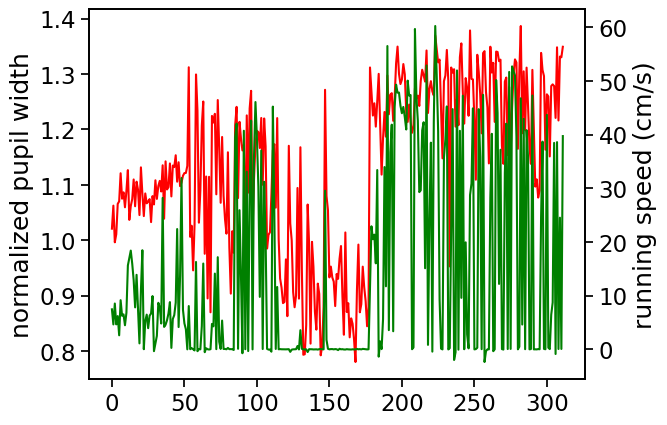

In [92]:
# Plot the running and pupil design matrices as traces to see what they look like
# Bonus if you use a twinx() to see both on the same axis
fig, ax = plt.subplots()
ax.plot(X_pupil, color='r', label='pupil_width')
ax.set_ylabel('normalized pupil width')
ax2 = ax.twinx()
ax2.plot(X_running, color='g', label='running_speed')
ax2.set_ylabel('running speed (cm/s)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the function we created above to cross-validate and test our linear model for each of the variables. 

Which one produces the highest score? 

In [93]:
# Now use our fancy new function to test a bunch of models.
seed = 5
x_stim_score,_,_,_  = crossValidateLinearModel(X_stim, y, shuffle = True, shuffle_seed=seed)
print(f'Stimulus model score {x_stim_score}')

x_pupil_score,_,_,_  = crossValidateLinearModel(X_pupil, y, shuffle = True, shuffle_seed=seed)
print(f'Pupil model score {x_pupil_score}')

x_running_score,_,_,_  = crossValidateLinearModel(X_running, y, shuffle = True, shuffle_seed=seed)
print(f'Running model score {x_running_score}')

Stimulus model score 0.20535990695746795
Pupil model score 0.014245255500929121
Running model score 0.03867683092425467


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4> What if our variables are correlated? </h4>

At face value it looks like our cell of choice heavily encodes stimulus identify, with weaker encoding of running and pupil size.

So...can we go to an early lunch? Not quite. The challence here is that running and pupil diameter are not necessarily indpendent variables. This makes that fact that our neuron shows a weak correlation with both of them difficult to interpret.

Let's plot the relationship of running and pupil

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now, lets return to the relationship between <b>pupil width</b> and <b>running</b> , using our design matrices which contain the average value of these variables for each stimulus presentation. 

Compute the <b>pearson correlation</b>  and put it in the title of the plot. Is the relationship significant?

1.2433533297618187e-36


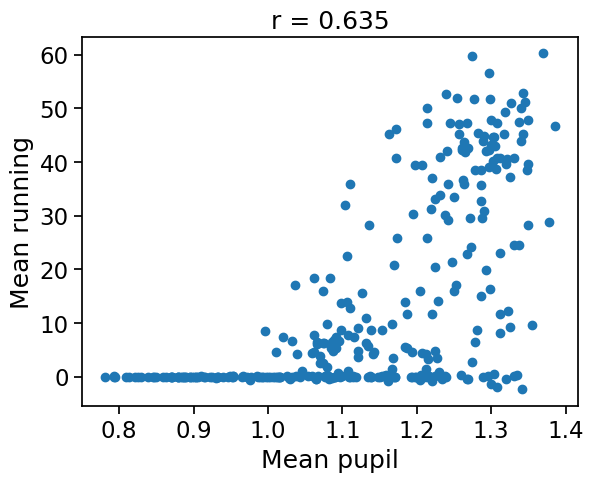

In [94]:
# Plot pupil vs running. Label your axes.
fig, ax = plt.subplots()
ax.scatter(X_pupil, X_running)
ax.set_xlabel('Mean pupil')
ax.set_ylabel('Mean running')

# Compute the correlation and print it out
r, p = pearsonr(X_pupil, X_running)
ax.set_title('r = '+str(np.round(r, 3)))
print(p)

How can we know if our model is pupil or running are actually imporving our model, or if its one only works because of this correlation? We will tackle this next.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 4: Does the prediction improve when additional variables are included? </h3>

In regression models, we are not limited to considering each feature one-at-a time. Instead, multiple features or sets of features can be combined into a single model simply by combining them in the design matrix used to train that model.

This is particularly useful when trying to determine if correlated features are uniquely encoded by a cell. To close today, we will see two methods for asking whether or not a given feature explains some of cell's variance beyond what could have been explained by our other modeled features. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Multiple linear regression </h3>

*Multiple Linear Regression* gives us tools to dissect the contributions of different features in explaining variance.

Just as we built a design matrix out of different stimulus identities, we can similary construct one that includes additional features about our data.

Let's create an X matrix that incorporates stimulus, pupil, and running

In [95]:
# Stack up the x matrices to make one big feature matrix
X_combo = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1)))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use our `crossValidateLinearModel` function from before to get the model prediction for this multi-variate X matrix.

In [96]:
# Provide X_combo and y to the function
x_combo_score,_,_,_  = crossValidateLinearModel(X_combo, y, shuffle = True, shuffle_seed=seed)
print(f'Combined model score {x_combo_score}')

Combined model score 0.2753154846221238


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Importantly, we cannot simply look at the model coefficients, as we did in the "stimulus only" example. This is because our model now contains different types of features with different magnitudes, and there is not a clear mapping between them. While the weights we fit will scale accordingly, they can no longer be directly compared. Visualizing the design matrix illustrates this problem.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the design matrix `X_combo` for the first 20 stimulus presentations.

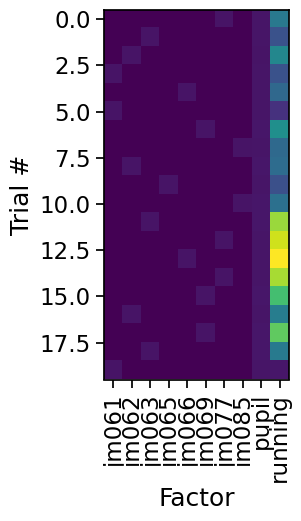

In [97]:
fig,ax = plt.subplots()

# For labeling our plot
xlabels = img_names.copy()
xlabels = np.append(xlabels,'pupil')
xlabels = np.append(xlabels,'running')

ax.imshow(X_combo[:20]) 
ax.set_ylabel('Trial #')
ax.set_xlabel('Factor')

ax.set_xticks(np.arange(0,len(xlabels)))
ax.set_xticklabels(xlabels,rotation = 90);


This shows images 1-8, then running speed for each trial, then pupil width for each trial

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

It is worth noting that `Scikit-Learn` has a tool called the `StandardScaler` that will normalize model inputs. This is useful if you want or need to more explicity compare coefficient weights across variables of different types, but we won't worry about that for now. You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Leave one out test </h4>

Instead, we can use the model scores - that is, the variance in our data explained by our model - to test the encoding of any particular feature.

Specifically, we can systematically drop out feature one at a time and see how model performance changes. If the model gets worse, it suggests that this feature was explaining some of the variance in our data. Because other features are still included, this method is a way to avoid mistakenly assuming that a cell encodes all of a set of correlated variables.

Let's create several design matrices, each with one of the variables left out

In [98]:
# Create each design matrix as a stacked combo of all the features except the one we are leaving out
X_wout_stimulus = np.hstack((X_pupil.reshape(-1,1), X_running.reshape(-1,1)))
X_wout_running =  np.hstack((X_stim, X_pupil.reshape(-1,1)))
X_wout_pupil =  np.hstack((X_stim, X_running.reshape(-1,1)))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `crossValidateLinearModel` function again to test model performance on each of the leave one out design matrices.

In [99]:
# Now use our fancy new function to test a bunch of models.
x_combo_score,_,_,_  = crossValidateLinearModel(X_combo, y, shuffle = True, shuffle_seed=seed)
print(f'Combo {x_combo_score}')

x_wout_stim_score,_,_,_  = crossValidateLinearModel(X_wout_stimulus, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Stim {x_wout_stim_score}')
print(f'Additional variance explained by stim {x_combo_score-x_wout_stim_score}')

x_wout_pupil_score,_,_,_  = crossValidateLinearModel(X_wout_pupil, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Pupil {x_wout_pupil_score}')
print(f'Additional variance explained by pupil {x_combo_score-x_wout_pupil_score}')

x_wout_running_score,_,_,_  = crossValidateLinearModel(X_wout_running, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Running {x_wout_running_score}')
print(f'Additional variance explained by running {x_combo_score-x_wout_running_score}');


Combo 0.2753154846221238
Wout Stim 0.053251295929841166
Additional variance explained by stim 0.22206418869228262
Wout Pupil 0.27884773822779596
Additional variance explained by pupil -0.0035322536056721643
Wout Running 0.2491955469299314
Additional variance explained by running 0.026119937692192396


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Impact of behavioral choice on model prediction </h4>

In part 2 above, we also suggested that cells encoded the difference between 'hit' and 'miss' trials (image changes with or without a lick). 

Build a complete model that includes these features using the same one-hot encoding method we used for the stimulus, then use this to quanitfy the relative contribution of stimulus identity vs. choice

In [100]:
# Get values from the stimulus response df for our cell
X_hit = cell_df.hit.values
X_lick = cell_df.licked.values

In [101]:
# Construct the full model
X_full = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_hit.reshape(-1,1), X_lick.reshape(-1,1)))

# And subset models lacking each variable
X_wout_hit = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_lick.reshape(-1,1)))
X_wout_lick = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_hit.reshape(-1,1)))

In [102]:
# Evaluate
x_full_score,_,_,_  = crossValidateLinearModel(X_full, y, shuffle = True,shuffle_seed=seed)
print(f'Combo {x_full_score}')

x_wout_hit_score,_,_,_  = crossValidateLinearModel(X_wout_hit, y, shuffle = True,shuffle_seed=seed)
print(f'Wout hits {x_wout_hit_score}')
print(f'Additional variance explained by hit-vs-miss {x_full_score-x_wout_hit_score}')

x_wout_lick_score,_,_,_  = crossValidateLinearModel(X_wout_lick, y, shuffle = True, shuffle_seed=seed)
print(f'Wout licks {x_wout_lick_score}')
print(f'Additional variance explained by licking {x_full_score-x_wout_lick_score}')

Combo 0.2681936812068336
Wout hits 0.2727078352496394
Additional variance explained by hit-vs-miss -0.004514154042805751
Wout licks 0.2816287579877998
Additional variance explained by licking -0.01343507678096617


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This result may be surprising, given that previously we showed that tunning can be different on hits vs misses.

To understand why this is happening, we need to think about what question we are asking with our model. In the previous problem, we used a single feature to encode whether a trial was a hit or a miss. This allows for changes in overall response on hit vs miss trials, but cannot account more subtle difference in tuning.

There are a couple ways to answer this question. One would be to adapt the linear modeling framework to handle two conditions of stimuli: hits vs misses

In [103]:
# Find which trials are hits and misses
is_hit = X_hit.astype(bool)

# Build two copies of the stimulus matrix: one for hits and one for misses
# When a trial is not in that category, set all values to 0.
X_hit_stim = X_stim.copy()
X_hit_stim[~is_hit,:] = 0
X_miss_stim = X_stim.copy()
X_miss_stim[is_hit,:] = 0

# Combine everything into a single design matrix.
X_seperate_stim = np.hstack((X_hit_stim, X_miss_stim))

This particular question reqires a little bit of special handling. To see why, lets look at the profile of hit vs. miss trials:

Text(0.5, 0, 'Trial #')

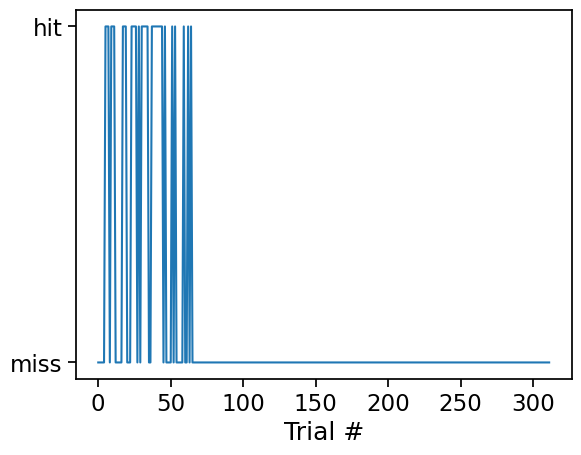

In [104]:
# plot X_hit over time to see how many trials are hits vs misses

fig,ax = plt.subplots()
ax.plot(X_hit.astype(int))
ax.set_yticks([0,1])
ax.set_yticklabels(['miss','hit'])
ax.set_xlabel('Trial #')

You will notice that there are *way* more miss trials, and that they are not evenly distributed through the session. If we were to just grab trials without paying attention to this, we could undersampling the hits and as a result overfitting our model. 

Fortunatly, `sklearn` includes a 'stratification' setting on its data splitters. Here, stratification just means that it will try to get equal sampling from input each specified catigory durring a spilt. The  `train_test_split` function has a 'stratify' input.


In [105]:
# Split miss trials
y_train, y_test, X_seperate_train, X_seperate_test = \
    train_test_split(y, X_seperate_stim, test_size=.5, train_size=.5, stratify=is_hit)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now Train a model

In [106]:
# Use the LinearRegression object with X_separate_stim matrix and the y value (cell responses) to predict
lr = LinearRegression(fit_intercept=False).fit(X_seperate_train, y_train)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now when we will, effectively, get two sets of coefficient: one for hit trials and one for miss trials. They will be combined into a single coefficient vector. 

Plot each set of coefficients; Do you notice any differences?  Hint: we did this earlier without a model fit

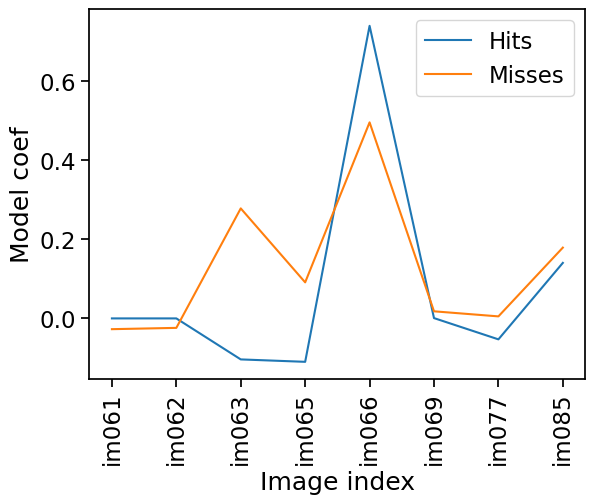

In [107]:
# Plot the coefficients for the hits and misses separately
fig,ax = plt.subplots()
ax.plot(lr.coef_[:8],label= 'Hits')
ax.plot(lr.coef_[8:],label = 'Misses')
ax.set_xlabel('Image index')
ax.set_ylabel('Model coef')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation=90)
ax.legend();

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>
Finally, lets evaluate our model on both our training and held out data. Recall that before, adding a 'hit' variable basically did nothing for our ability to predict new data. 
    
What do this difference between these methods tell us about encoding in our example cell?

In [108]:
lr.score(X_seperate_test, y_test)

0.26014344623139407

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h2> A note on cell types & neural encoding </h2>

<p> Many studies have shown that different types of neurons have different encoding of sensory, behavioral, and task variables. 
For example, Somatostatin (Sst) and Vasoactive intestinal peptide (Vip) expressing inhibitory neurons in the visual cortex are known to show modulation by locomotion, arousal, attention, and learning. 

Here is a useful review on how animal behavior and learning influence the coding of different cell types in the visual cortex: 
https://doi.org/10.1016/j.conb.2018.04.020

In addition, Sst and Vip inhibitory neurons are known to mutually inhibit each other and a shift in the balance between them can lead to disinhibition of excitatory neurons under certain conditions, such as with task engagement or novelty or arousal (all conditions that are included in the Visual Behavior Ophys dataset). 

In the <b>Visual Behavior Ophys</b> dataset, 3 different <b>transgenic mouse lines</b> were used to express GCaMP in either <b>excitatory neurons</b> (labeled by the Slc17a7-IRES2-Cre driver line), <b>Sst inhibitory neurons</b> (labeled by the Sst-IRES-Cre driver line), and <b>Vip inhibitory neurons</b>  (labeled by the Vip-IRES-Cre driver line). 

You can learn more about optical physiology and transgenic mouse lines in the <b>*DataBook*</b>. 

![cre_lines.png](../../resources/cre_lines.png)

In our next encoding adventure, lets ask whether Sst and Vip cells have distinct coding for running or pupil diameter.

</div>

## Encoding continuous variables

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Are cells tuned for running speed or pupil diameter? </h3>

Another factor that could influence neural variability and contribute to neural encoding is locomotor behavior, or the behavioral state of the animal. Many studies have shown that animal movement and overall arousal state can influence the gain of sensory tuning. Running and other movements are also directly encoded by some neurons in the visual cortex, independent of stimulus identity. 

The dataset object contains info about the mouse's `running_speed`, in addition to information about pupil diameter and gaze location in the `eye_tracking` attribute. Running speed and pupil diameter are typically correlated, and both can be used as measures of overall arousal and behavioral state. 

Let's plot the activity of our Sst cells as a function of the mouse's running speed or pupil diameter to see if these neurons encode behavioral variables.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `running_speed` attribute of the dataset object and plot the running speed. 

Remember that running speed is sampled at the stimulus display frequency, so you can use `stimulus_timestamps` to plot time on the x-axis. 

Text(0.5, 1.0, 'Ophys experiment ID 1080945462')

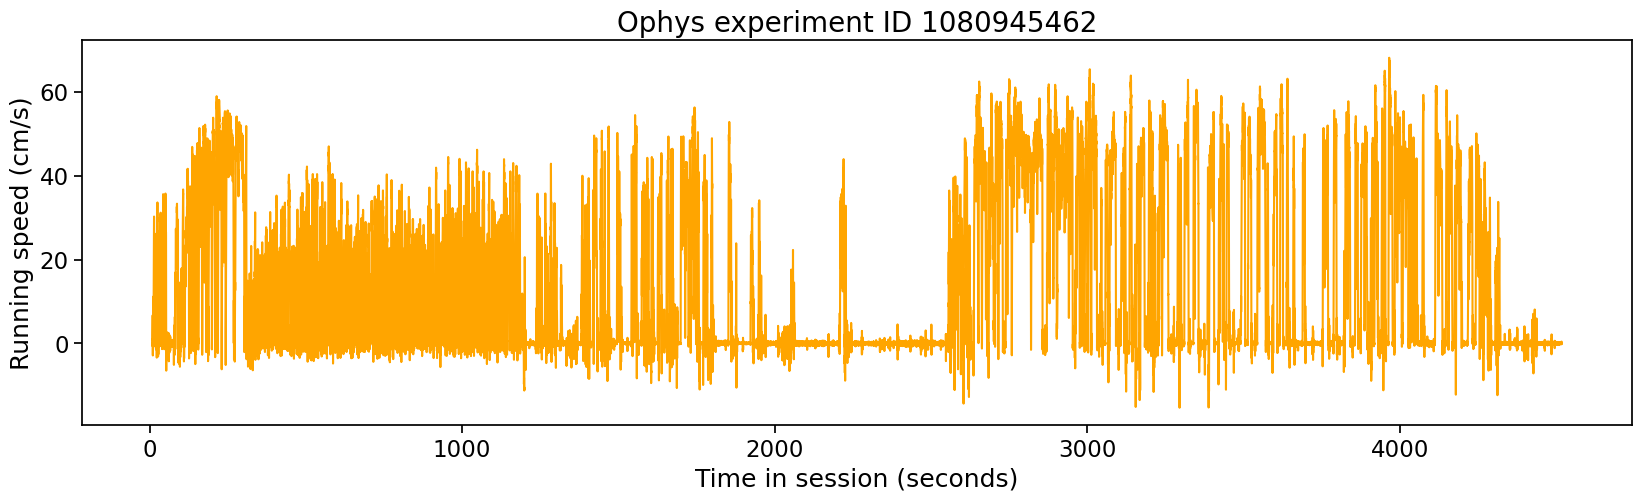

In [ ]:
# Plot the running speed, with stimulus_timestamps on x-axis

fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'], color='orange', linestyle='-')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Running speed (cm/s)')
ax.set_title('Ophys experiment ID {}'.format(ophys_experiment_id), fontsize = 20)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `eye_tracking` attribute of the dataset object. What are the columns? 

Plot `pupil_area` over time. 

In [ ]:
# Whats in the eye_tracking table?
dataset.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,...,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,
0,0.18393,130.298881,69377.698731,33673.240498,False,33673.240498,130.298881,69377.698731,239.119872,261.345519,...,251.507367,249.450037,162.755074,135.686138,-0.112888,252.891831,249.216575,94.347357,103.530311,-0.057726
1,0.19730,120.969632,69424.125570,32157.121188,False,32157.121188,120.969632,69424.125570,239.060212,261.688425,...,251.739167,249.518556,162.106561,136.320118,-0.114363,253.686626,249.194154,95.002512,101.172771,-0.009237
2,0.20457,118.469282,69532.491033,30610.926197,False,30610.926197,118.469282,69532.491033,238.667035,261.626304,...,251.765705,248.607848,162.768950,135.977281,-0.103537,252.373206,248.036840,94.481371,98.710488,-0.157400
3,0.23025,109.225777,69369.036385,32355.697657,False,32355.697657,109.225777,69369.036385,238.783878,261.975695,...,252.266157,249.065804,162.359517,135.999728,-0.095117,251.198744,250.107586,94.488796,101.484671,0.138696
4,0.26757,112.396794,69396.405593,30382.966716,False,30382.966716,112.396794,69396.405593,238.387263,261.896105,...,251.472874,249.306866,162.014394,136.343206,-0.121260,251.878161,248.939072,94.486745,98.342253,-0.053665


Text(0.5, 1.0, 'Ophys experiment 1080945462')

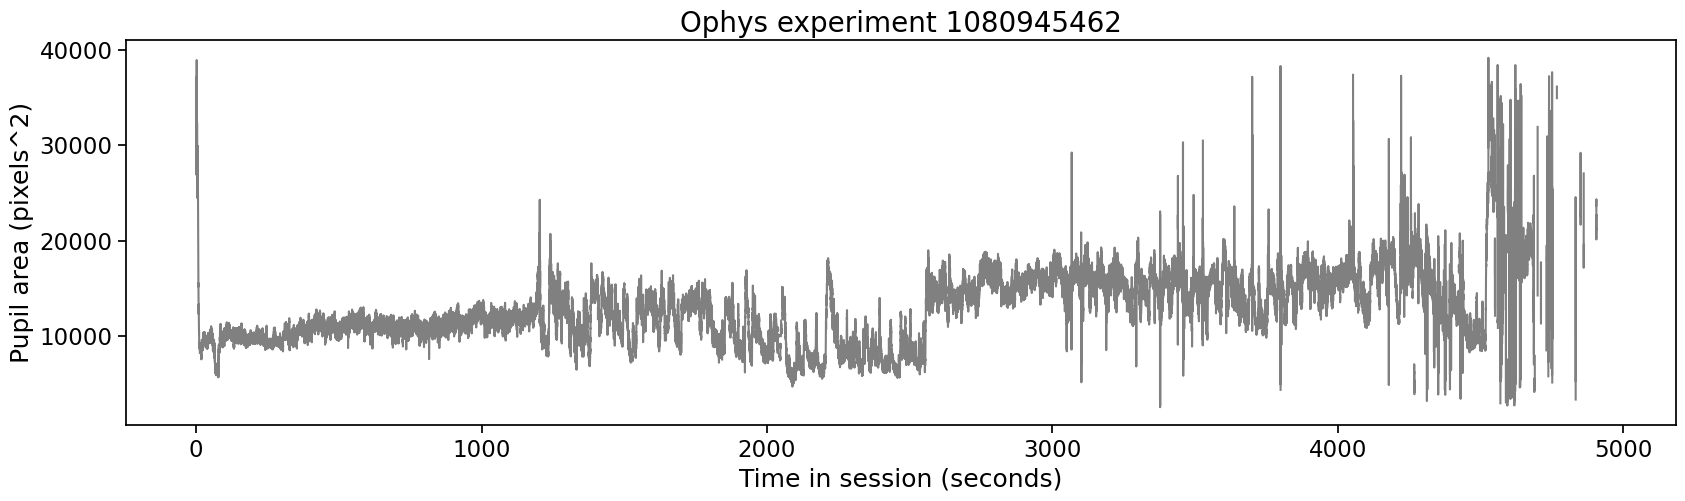

In [ ]:
# Plot the pupil area over time
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.eye_tracking.timestamps, dataset.eye_tracking.pupil_area, color='grey')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

A note about filtering and signal processing

Note that there are some very large spikes in the pupil area in some parts of the session. These are probably artifacts of the pupil detection algorithm, and could be filtered out using `scipy.signal.medfilt`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html. This function works by setting each point to be the median of its immediate neighborhood of `kernel_size` points, so is a good tool for data with obvious outliers. 

Note that because kernel size is measured in points rather than timebins, this function makes the most sense to use when sampling rates are fairly consistent.

Text(0.5, 1.0, 'Ophys experiment 1080945462')

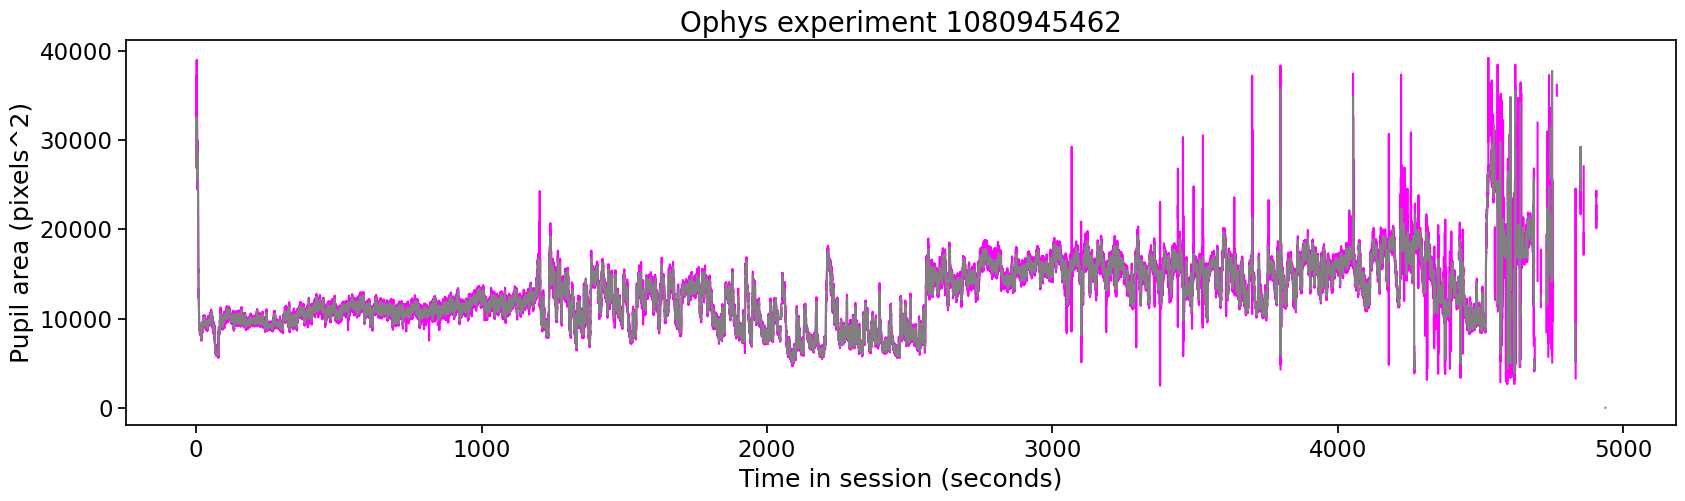

In [ ]:
from scipy.signal import medfilt

fig, ax = plt.subplots(1,1, figsize = (20,5))
fit_pupil_area = medfilt(dataset.eye_tracking.pupil_area, kernel_size=21)   
ax.plot(dataset.eye_tracking.timestamps, dataset.eye_tracking.pupil_area, color='magenta')
ax.plot(dataset.eye_tracking.timestamps, fit_pupil_area, color='gray')

ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Now that we have a handle on this behavior data, lets try plotting running speed and tuning together. Do they look like they might be related to one another?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the `running_speed` and `pupil_area` on the same axies

Text(0.5, 1.0, 'Ophys experiment 1080945462')

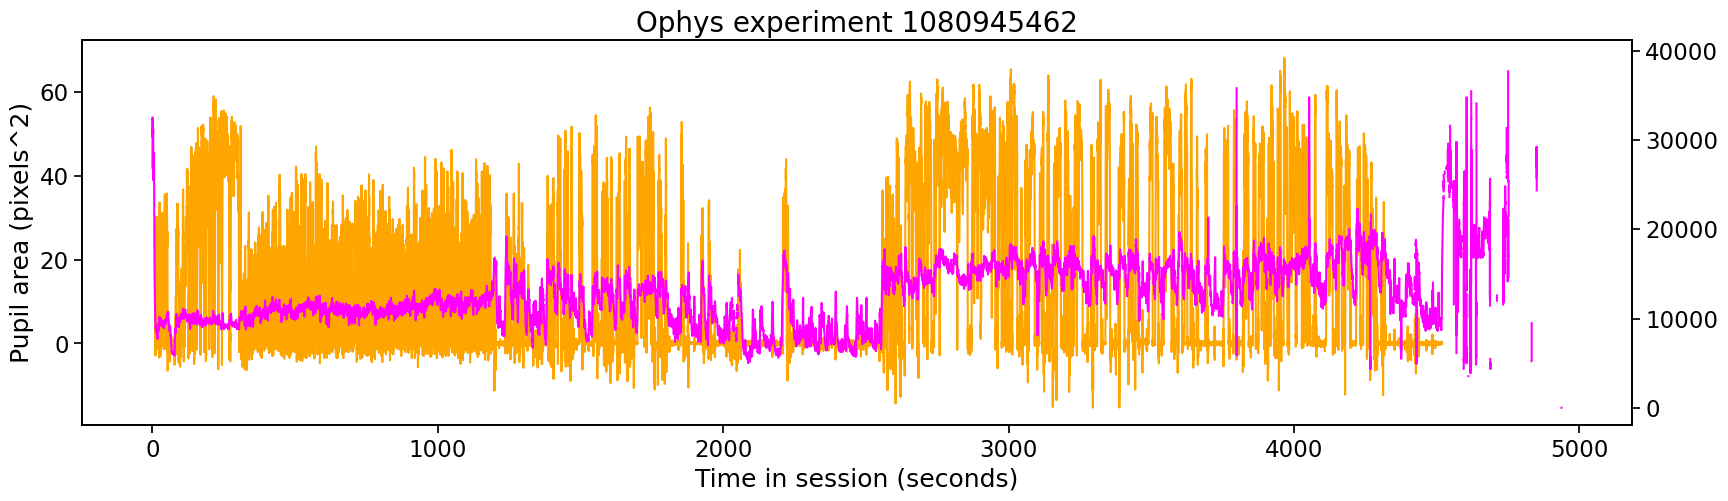

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
fit_pupil_area = medfilt(dataset.eye_tracking.pupil_area, kernel_size=21)   
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'], color='orange')

ax2 = ax.twinx()
ax2.plot(dataset.eye_tracking.timestamps, fit_pupil_area, color='magenta')

ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Tuning for continuous variables </h4>

One challenge in working with these data is that running, eye tacking, and neural activity are all sampled on separate data streams with different timestamps. This means that even though these data were all collected at the same time, there isn't necessarily a one-to-one matchup between timestamps in one data stream or other.

The most common solution to this solution to this problem is data resampling. Typically timestamp bins are defined, and data are resampled into a common time stream. What size bin should you use? This depends on the timescale that is relevant to the analysis at hand.

For today, we will be using stimulus-presentation bins to look at our data over a relatively large timescale. Specifically, we will use the `stimulus_response_df` that we generated above, which contains the mean response for each stimulus presentation, along with the `annotated_stimulus_presentations` table that we merged into it, which contains the mean running speed for each stimulus presentation. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the stimulus response data for our special cell and plot `running_speed` and `mean_response` against each other

In [ ]:
# Get the stimulus response dataframe just for a particular cell
cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]

Now that we have binned data, lets try plotting the relationship between running speed and the activity of our cell.  


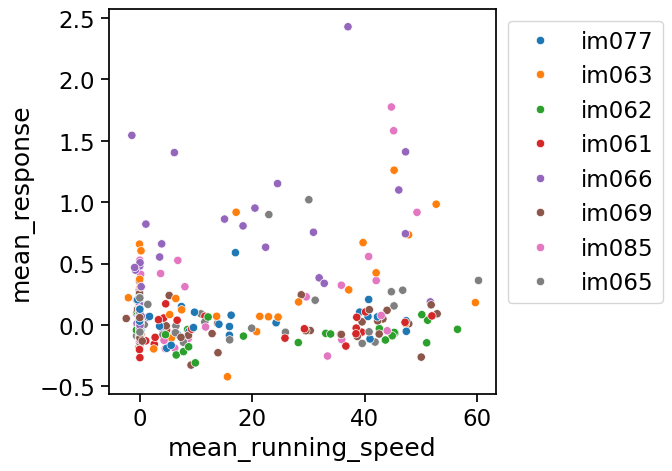

In [ ]:
# Plot this cells mean response versus running speed for each stimulus presentation
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_running_speed', y='mean_response', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Repeat using the `mean_pupil_width` column.

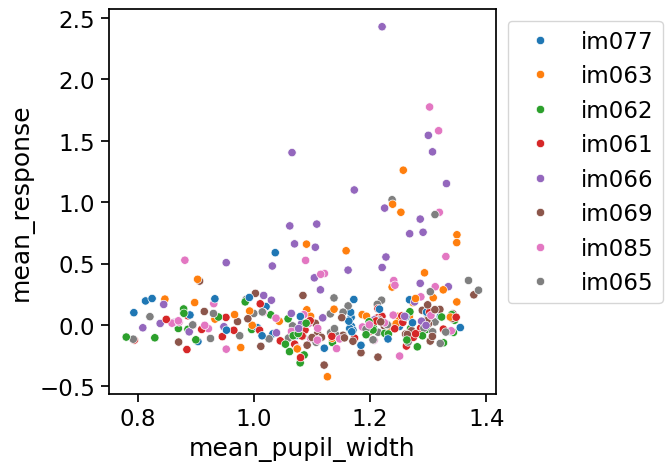

In [ ]:
# Plot mean pupil width across trials against this cells mean response
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_pupil_width', y='mean_response', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>


Great! Our cell encodes both pupil diameter and running speed. 

You will recall, however, that these variables themselves are also correlated looked like they might have had a relationship to each other. Now that we have nicely binned data, try explicitly plotting the relationship between `mean_pupil_width` and `mean_running_speed`

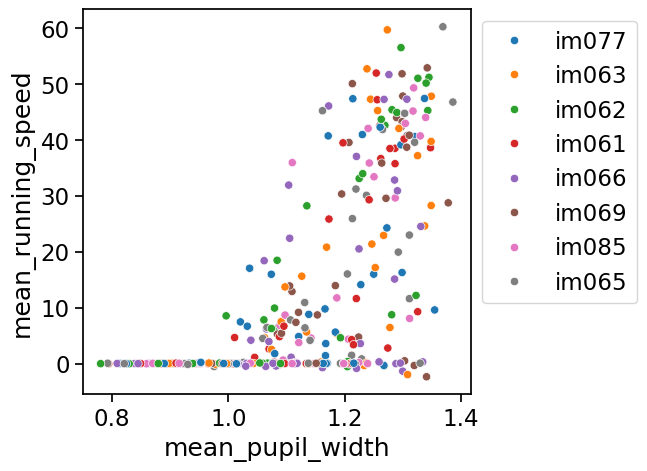

In [ ]:
# Plot pupil width and running speed binned by stimulus presentations against each other

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_pupil_width', y='mean_running_speed', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

So...which of the factors best explains the variability in trial-to-trial responses of our cell? 

In the next section, we will dive deeper into this problem. Specifically, we will use regression models to pull apart the variance explained by different concurrent features on their own, as well as their interactions.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Part 3 -  Quantifying single cell coding with regression models </h3>

Up to now, we looked at how single cell activity varies across different conditions, like which image was shown, or whether the mouse was running or not. 
But are these conditions reliable predictors of cell activity? 

To say that a cell "encodes" something, we want to know that the cell activity is reliably predictable based on that something. 
In other words, can we model a cell's activity based on different variables or predictors?

Regression models provide a mathematical framework for investigating these questions. Here, we will use linear regression to investigate which behavioral features are encoded by neurons.


Questions: 
    
(1) How can linear regression be used to model neural coding? 

(2) How do you ensure that your model is valid and is not overfitting?

(3) How well can you predict neural activity based on stimulus information? Behavioral information? 

(4) Does the prediction improve when additional variables are included? 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Linear regression </h3>

    
In a regression problem, we are have pairs of data points  $(𝑥⃗_𝑖,𝑦_𝑖)$
  where  𝑖∈[1,𝑁]. We want to develop a function  $𝑓(𝑥⃗ )$
  such that  $𝑓(𝑥⃗_𝑖)≈𝑦_𝑖$
  for each pair of points in the data set.
    
    
The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the question you are trying to answer. They are often called "features".  
    
The coefficients $w_j$ are called "weights." When we talk about fitting a regression model, what we mean is determining the best set of weights for our  $𝑓(𝑥⃗_𝑖) \rightarrow 𝑦_𝑖$ mapping? 



But what is the "best" set of weights? We try to choose the weights that minimize overall error between $f(x)$ and $y$.In the case of linear regression we use the sum of squared residuals between our for each $𝑓(𝑥⃗ 𝑖)$ and the corresponding $y_i$:

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $



This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.



The `scikit-learn` website:  http://scikit-learn.org/stable/

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 1: How can linear regression be used to model neural coding? </h3>
<p>

You may be familiar with a version of linear regression where the functions  𝜙 are chosen to be the identity and a constant. When the input space is one dimensional this is:

$𝑓(𝑥_i)=\sum_j w_j \phi(\vec{x}_i) = 𝑤𝑥_i+c$

This simple model assumes that $f(x)$ scales linearly as a function of $x$. 

However, even if the variables in our model do not have a perfect linear relationship, this model might still be useful; in practice, so long as $x$ and $y$ have a monotonic relationship, we would still expect to see the model explain some fraction of the variance in our data. This is equivalent to saying that $x$ and $y$ are linearly correlated.

Above, we noted that some cells have a correlation with the animals pupil width during each stimulus. First, lets use linear regression to mathamatically formalize this relationship. 

Once again, we can use the `stimulus_response_df` we computed to get the mean pupil width and mean response for each stimulus presentation. We will use these to start fiting our model. This time around, however, pupil width will be `X` and mean response will be `y` to be consistent with the math above.

Text(0, 0.5, 'Mean cell response')

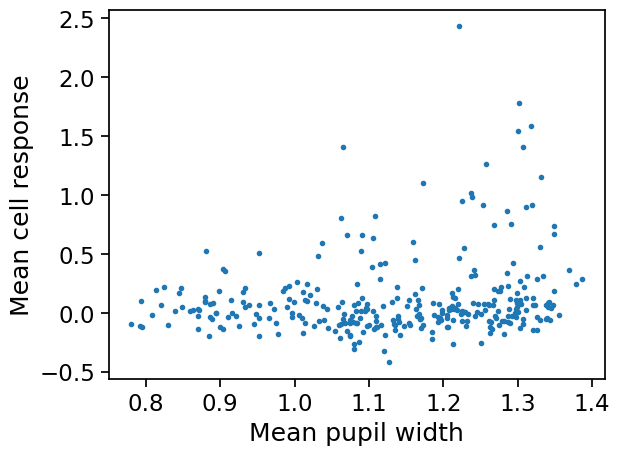

In [ ]:
# To match the equations above and the sklearn convention,
# We will call our predictor / encoded variable "X" and our response variable "y"
X = cell_df.mean_pupil_width.values
y = cell_df.mean_response.values
fig,ax = plt.subplots()
ax.plot(X, y, '.')
ax.set_xlabel('Mean pupil width')
ax.set_ylabel('Mean cell response')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

You are most likely familiar with the concept of (linear) correlations. If $X$ an $y$ are correlated, then covariance in $X$ and $y$ will arroach the variance in $X$ and $y$ on their own. We often use a quantity called "pearsons correlation" or "pearsons r" to quanitify this:
    
$$R_{pearson} = \frac{Cov(X,y)}{\sigma_X\sigma_y}$$
    
This number gives us the fraction of variance we in one variable that can be described by knowing the other variable. The maximum value that can be acheived by this metric is 1, which means that $X$ and $y$ covary perfectly together. The minimum value of -1 says that their variance is oposite one another (i.e. when $X$ goes up $y$ goes down). A value of zero means that there is no similarity between the variance of the two variables.
    
If $X$ and $y$ are correlated (or anti-correlated!), we will fit a non-zero value for $w$ when we do our model fit. However, simply noting the correlation would be *Descriptive* - it wouldn't tell us anything about how consistent this correlation is across the dataset. A few spurious data points could lead to a correlation that does not hold throughout our data. 

`scipy` has pre-implemented calculators for data correlation. Here, we can quickly test if, for example, our data are pearson correlated.

In [ ]:
from scipy.stats import pearsonr

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use `pearsonr` to compute the correlation between the mean cell response and the mean pupil width on each stimulus presentation.

In [ ]:
# Compute the correlation of X and y (pupil width and cell activity)
pearson_corr,pearson_pval = pearsonr(X,y)
pearson_corr

0.19368426978396677

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Regression provides a *Predictive* model. For new values of $x$, we can produce an estimate of what $y$ should be. Importantly, the predictive nature of our model also proves to be an important tool for assessing whether our model consistently represents our data. 

We do this by splitting our dataset into parts. Just as we did above, we will train the model on on part of our dataset, then evaluate it on data that was withheld from this initial training.

In [ ]:
# Split the data 
from sklearn.model_selection import train_test_split

np.random.seed(4)# Setting the random seed here insures that everyone gets the same result when they run this notebook!

# Use sklearn train_test_split 
y_train, y_test, X_train, X_test = train_test_split(y, X)

In [ ]:
# What do each of these splits look like? 
print('length of y_train', len(y_train))
print('length of y_test', len(y_test))
print('length of X_train', len(X_train))
print('length of X_test', len(X_test))


length of y_train 234
length of y_test 78
length of X_train 234
length of X_test 78


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now that we have our data ready, we can import the `scikit-learn` package (we will call it "sklearn" to save some typing). It has a nice interface for fitting regression models that allows us to not worry about implementing our own solution for the cost function above.

In [ ]:
from sklearn.linear_model import LinearRegression

The sklearn interface is object oriented. This means that to fit a model, we need to instantiate a "LinearRegression" object. We will then use this for to handle our fitting.

In [ ]:
# Initialize the LinearRegression object
LR = LinearRegression()

Now that we have our object, we can fit data using the built in "fit" function.

In [ ]:
# Note that LinearRegression requires X to be two dimensional - why this is will be apparent shortly
LR.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

<!-- Thats it! We have our first model!  -->

We can now look carefully at the `sklearn` object to learn about the model fit we just performed. Here, `coef_` contains the weight vector $\vec{w}$ for our model, and `intercept_` contains the constant $c$

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `coef_` and `intercept_` attributes of the `LinearRegression` object.

In [ ]:
# Print the coef_ attribute of the LinearRegression object
LR.coef_

array([0.43830462])

In [ ]:
# print the intercept_ attribute of the LinearRegression object
LR.intercept_

-0.38351225429121255

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now that we know the weight and intercept for this model, plot the line we just fit, overlaid with the data.

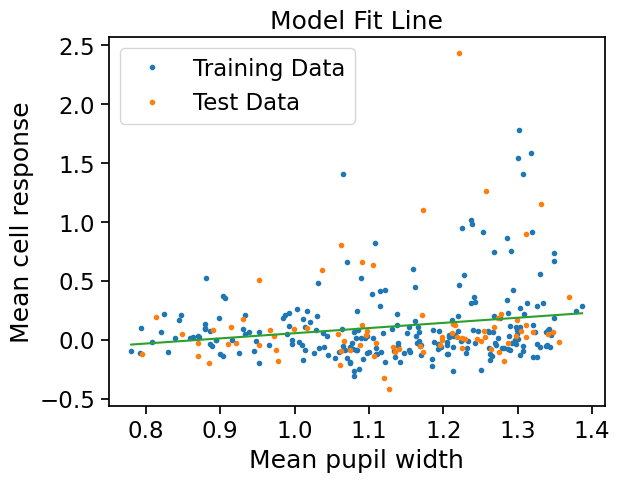

In [ ]:
# Plot x and y values
fig,ax = plt.subplots()
ax.plot(X_train, y_train,'.', label='Training Data')
ax.plot(X_test, y_test,'.', label='Test Data')
# Plot the fit 
xx = [np.min(X), np.max(X)]
ax.plot(xx,LR.coef_*xx+LR.intercept_)
ax.set_xlabel('Mean pupil width')
ax.set_ylabel('Mean cell response')
ax.set_title('Model Fit Line')
ax.legend();


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now let's look at how well our model does at predicting data.

The `LinearRegression` object has a method to evaluate the `score` of the model. 
    
The default score used in `sklearn` is called the coefficient of determination, or $R^2$. This number gives the fraction of the variance in in a dataset that is described by the model. Specifically, it compares the ratio of the sum of squared residuals for the model:
    
   $$SS_{residuals} = \sum_i{(y_i-f_i)^2}$$
    
And compares this the sum of squared residuals if you had just used the mean of your data, $\bar{y}$, as your model (this will be proportional to the model variance). This later quanity is called the "total sum of squares"
    
   $$SS_{total} = \sum_i{(y_i-\bar{y})^2}$$
$R^2$ is defined:
    
 $$R^2 = 1-\frac{SS_{residuals}}{SS_{total}}$$
    

$R^2$ will be 1 for a model that captures 100% of the avalible variance, and 0 for a model that captures non. If can also be less than 0 if using your model provides a worse prediction if you had just guessed with the mean of your data!

Lets compute the score for our training data.

In [ ]:
# How did we do with our training data?
training_score = LR.score(X_train.reshape(-1,1), y_train)
training_score

0.04143414954968527

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
One more quick note about $R^2$. You will have noticed that earlier we computed $R_{pearson}$ value. If your $X$ and $y$ are the same, then $R^2 = R_{pearson}^2$. This later definition of $R^2$ is ultimatly more useful for us here, however, because it will allow us to quantitativly assess model predictions on new data!



In [ ]:
training_r = pearsonr(X_train, y_train)[0]
training_r**2

0.041434149549685544

Is this number meaningful? We will delve into this now.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 2: How do you ensure that your model is valid and is not "overfitting"?</h3>
<p>

"Overfitting" is a term used to describe the case in which learns does very well in describing the data that it is trained on, but fails to predict new or additional data. Another way of saying this that a model will learn to describe noise or idiosyncrasies of the training data, rather than the underlying relationships that you are trying to model.

To illustrate overfitting, lets pause for a quick thought experiment. Imagine that, instead of fitting the two parameter model we just used, we fit a model with $N$ parameters where $N$ is the number of data points. Our model, which could look like this:

$𝑓(𝑥_i)=\sum_{i = [1,N]} w_i\vec{x}_i$

We call this a "saturated model" because it is saturated with parameters. Once we fit this model, we would discover that we could now *perfectly* predict every single data point. In this linear case, we would now find $f(x_i)=y_i$, with error of 0. 

So...why don't we do this? Wasn't our goal to get the lowest error possible? 

You have probably already noticed the two big problems with this saturated model. First, we can't learn anything from its weights. Regression is guided dimensionality reduction exercise, where we try and describe our data with a chosen set of features. The saturated model fails to do this. Second, this model is worthless for explaining new data. It assumes a 1-to-1 $x_i\rightarrow y_i$ mapping, and is undefined for new points or allows assumes no variance for repeated observations.

Even if we move away from this extreme case, it is still possible to overfit a model simply by fitting weights to too many features. Spurious correlations in your data will appear to be explained by the additional features in your training data, only to limit your ability to predict held out data. 

<b>
In this section, we will introduce a technique known as "Cross-Validation" as a way to systematically test if you have a "good" model.

<p>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

*One more aside about saturated models: the deliberately overfit saturated model is always going to be the model with the lower error possible error. It is therefore useful as as a comparison tool to determine how well your model fit does. In the linear case, the error of the saturated model is always 0 so we don't really need to think about it. If, however, we are doing non-linear regression, the saturated model becomes a useful in assessing model performance.*

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What is the models performance on our held-out testing data (`X_test` and `y_test`?

Use the `score` method again, but provide the held out test data instead.

Is it lower or higher than the score for the training data? Is it greater than or less than zero? What can we learn from answering these questions?


In [ ]:
# Compute the score for the held out test data
LR.score(X_test.reshape(-1,1),y_test)

0.028250165482394562

A score of .028 indicates that we explain 2.8% of the variance in our test data by using this model. This isn't a lot, and it is lower than the variance we explained using the training data suggesting that we aren't doing quite as well at predicting the pupil-neuron relationship in this new data. However, it is greater than 0, which means our model has SOME predictive power, even if it is small!

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This "training" and "testing" split approach would be great if data were always cheap and plentiful. In practice however, it can be frustrating to use most of your hard-earned data to train a model, only learn how it performs on a held out subset.

A common aproach to dealing with this problem is known as <b>*Cross Validation*</b> Here, we systematically hold out chunks of data, refitting our model on the remaining data each time. By performing multiple model fits, we can (1) use all our data and (2) get a better sense of how our data varies across the dataset.

There are many ways to do cross validation, and how you split things up can have a big influence on the question you are trying to answer. Lets start with one of the simplist and most common forms of cross validation, known as <b>KFolds</b>. Here, we split (i.e. fold) our data $k$ times, with equal sample sizes in each fold. We then fit $k$ models to our data. 

What is <b>$k$</b>? We will use 5 for now. It can be anywere from 2 to $n$ where $n$ is the number of samples in your dataset. This extreme case, where $n$ is the same as the number of samples you have is called "leave-one-out" cross validation.



Here is an example of how to do 5 fold cross validation

In [ ]:
# Simple 5 fold cross validation
n_folds = 5
fold_num = np.zeros(len(X))

# Assign data into 5 groups:
fold_group = np.arange(0,len(X))%n_folds
fold_group

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,

Now that we have groups, we can loop through and fit a model to each.

In [ ]:
# Compute the test & training score for each fold

# Create an empty array to save the data in
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
# Loop over folds, fit the model, and compute the scores on training & test data
for ii in range(n_folds):
    lr = LinearRegression()
    lr.fit(X[fold_group!=ii].reshape(-1,1), y[fold_group!=ii])
    self_score[ii] = lr.score(X[fold_group!=ii].reshape(-1,1), y[fold_group!=ii])
    cross_score[ii] = lr.score(X[fold_group==ii].reshape(-1,1), y[fold_group==ii])

# Print out the results
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')


Training Score: [0.03664552 0.02939928 0.0367122  0.04242109 0.04378197]
Testing Score: [-0.02002886  0.07146236 -0.06701194  0.02163582  0.00956463]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What is the average test score across folds?

In [ ]:
# Take the mean of the scores across folds
np.mean(cross_score)

0.00312439864097831

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

`sklearn` provides a convient object for splitting data, so that you don't need to write your own splitting code. It is called `KFolds` and is housed in the `model_selection` modual.

Just as we did with the `Regression` object, the `scikit-learn` interface has us instantiate a `KFold` object, which provides a generator object that we can use to loop through our data.

In [ ]:
from sklearn.model_selection import KFold

# Generate the folds
folderizer = KFold(n_splits=5)
folderizer.split(X,y)

<generator object _BaseKFold.split at 0x7f81c7589b30>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

What is a generator object? Each time it is called, it will generate the next of n folds in our data. It can therefore be incorporated into a for loop using the following syntax:

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's repeat the exercise above, to fit the model and compute the score across folds, but now using the `KFold` generator object

In [ ]:
# Initialize KFold object
n_folds = 5
folderizer = KFold(n_splits=n_folds,)

# Create an empty array to save the data in
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
# Loop through folds, fit model, save scores
for ii, (train_index, test_index) in enumerate(folderizer.split(X, y)):
    lr = LinearRegression()
    lr.fit(X[train_index].reshape(-1,1), y[train_index])
    self_score[ii] = lr.score(X[train_index].reshape(-1,1), y[train_index])
    cross_score[ii] = lr.score(X[test_index].reshape(-1,1), y[test_index])
# Print out the results
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')

Training Score: [0.04488332 0.03662592 0.03801326 0.02817329 0.04056242]
Testing Score: [-0.0378296   0.03437174 -0.04101175  0.0233176   0.00756938]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

And once again, compute the average testing score across folds. 

(1) Is it different from what we did before? Why? Hint: Note how we split the data before and compare to KFolds: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

(2) What does this tell us about pupil responses in our data?

In [ ]:
# Take the mean and print it out
print(f'Average Testing Score: {np.mean(cross_score)}')

Average Testing Score: -0.002716529144150592


## Conclusion

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Conclusion </h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> 
Regression is a powerful way to quantitativly probe the relationships between variables. In this tutorial, we have seen how it can be used to understand what and how various stimuli and behavioral features are encoded by single neurons.

<p>  
In the interest of time, we will end by admitting we the most certainly haven't shown you everything that you can do with regression. We will close this tutorial quickly highlighting a few other useful regression applications that you might find yourself wanting later in the course (or beyond!).

<p> 
  <b>  (1) Regression is a great way to survey a large amount of data.</b>  
    <p>
        As datasets get biger and easier to collect, we need tools that allow us to probe many cells or variables in an efficient manor. Regression models offer a way to screen large amounts of data. You might, for example, fit a regression model to every cell in the Visual Behavior dataset to ask "which cell types are most modulated by running speed." 
<p>
In the next tutorial, we will learn about a related set of tools called "Decoding Models." These models allow you understand what is encoded in a neural population by explicity decoding that information from a recoding. These techniques are often used in tandem - you might, say, decode running from an entire population of neurons, then use regression models to look at how individual cells suport your decoding analysis.
    
<p>   
<b> (2) Regression models are predictive </b>
<p>
Here, we focused entirly on cases where we were predicting similar but held out data with our model. Often, however, we use regression to look at differences between condition by fitting a model on one condition and predicting on the other. This is very related to what we did with hits and misses: by seperating the design matrix there, we effectivly trained one model on 'hits' and another on 'misses.' An alternative way of doing this analysis would have been to see how well (or badly) the hit model did at predicting miss trials or visa-vera.
    
<p>
<b> (3) Linear models are the simplist,  but there is no rule that regression needs to be linear</b>
<p>  
Everything we have done here is commonly refered to as a "General Linear Model," or gLM. These are super useful, but this model class makes a big assumption about the variance distribution of our data: specifically, we assumed that variance is normally distributed about some mean value, $f(x)$. This is mathmatically the easiest thing to do, but it turns out to not always be the best assumption.

    
<p> 
In fact, there is a very specific case that often arrises in neuroscience where we know this assumption to be particularly bad: Spike trains. Spikes are discrete, transient events. Over a given time interval, there can never be fewer than 0 spikes, and there can never be a fractional number of spikes. If we assume that spikes are occure indepently with an average rate (call it $\lambda$), then a poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution) can be shown to be a good model of this variance. We can make a regression model that assumes poisson variance if we fit the following:
    
<p>
$ln(\lambda) = \beta X$ or equivalently $\lambda = e^{\beta X}$
    
<p>
Here, adding the $ln(*)$ term makes the model harder to fit, but fortunatly, `sklearn` ships with an implementation of poisson regression. It can also handle other commonly used non-linearities (called link functions) (e.g. those for exponential data, logistic data, etc. https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models). 

    
<p>
Because this class of models is a generalization of the general linear model, they are commonly called "General*ized* Linear Models," or GLMs. Yes, this nomenclature is confusing- if it makes you feel any better, the people who created it later admitted they should have chosen a better name. You will sometimes also hear of these models refered to as "Linear-Non-linear" models, because the linear and nonlinear parts can be mathematically seperated.

<p>
All of the tools we have discussed for linear regression can be applied to GLMs. More information on this method is avalible in the Data Book!
